In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sys
from pathlib import Path

In [32]:
sys.path.append(str(Path.cwd().parents[0]))


In [33]:
from breast_cancer_ml import config


2025-04-25 21:15:29.638 | INFO     | breast_cancer_ml.config:<module>:12 - PROJ_ROOT path is: C:\Users\Maryl\breast_cancer_classifier


In [35]:
data = pd.read_csv(config.RAW_DATA_DIR / "breast-cancer.csv")



In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.shape

(569, 32)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
#data dictionary 
data_dict = {'id': "categorical variable to uniquely identifiy each row",
             'diagnosis' : "Categorical variable for the diagnosis of the breast tissue. M means malignant and B means benign. This variable is the Target feature.",
             'radius_mean' : "Mean of distances from center to points on the perimeter. Continuous variable",
             'texture_mean' : "Standard deviation of gray-scale values. Continuous variable",
             'perimeter_mean' : "Mean size of the core tumor. Continuous variable",
             'area_mean' : " ",
             'smoothness_mean' : "Mean of local variation in radius lengths. Continuous variable",
             'compactness_mean' : "Mean of perimeter^2 / area - 1.0. Continuous variable",
             'concavity_mean' : "Mean of severity of concave portions of the contour. Continuous variable",
             'concave points_mean' : "Mean for number of concave portions of the contour. Continuous variable",
             'symmetry_mean' : " ",
             'fractal_dimension_mean' : "Mean for 'costline approximation' - 1. Continuous variable",
             'radius_se' : "standard error for the mean distances from the center to points on the perimeter. Continuous variable",
             'texture_se' : "standard error for standard deviation of gray-scale values. Continuous variable",
             'perimeter_se' : " ",
             'area_se' : " ",
             'smoothness_se' : "standard error for local variation in radius lengths. Continuous variable",
             'compactness_se' : "standard error for perimeter^2/area -1.0. Continuous variable",
             'concavity_se' : "standard error for severity of concave portions of the contour. Continuous variable",
             'concave points_se' : "standard error  for number of concave portions of the contour. Continuous variable",
             'symmetry_se' : " ",
             'fractal_dimension_se' : " standard error for 'costline approximation' -1. Continuous variable",
             'radius_worst' : "'worst' or largest mean value for mean of distances from center to points on the perimeter. Continuous variable",
             'texture_worst' : " 'worst' or largest mean value for standard deviation of gray-scale values. Continuous variable",
             'perimeter_worst' : " ",
             'area_worst' : "" ,
             'smoothness_worst' : " 'worst' or larges mean value for local variation in radius lengths. Continuous variable",
             'compactness_worst' : " 'worst' or largest mean value for perimeter ^2/ area - 1.0. Continuous variable ",
             'concavity_worst' : " 'worst' or largests mean value for severity of concave potions of the contour. Continuous variable",
             'concave points_worst' : " 'worst' or largest mean value for number of concave portions of the contour. Continuous variable ",
             'symmetry_worst': " ",
             'fractal_dimension_worst' : " 'worse' or largets mean value for 'coastline approximation' -1. Continuous variable ",
    
}

In [9]:
data.drop('id', axis = 1, inplace = True)

There are 8 features that I was not able to find information on from Kaggle
area_mean, symmetry_mean, perimeter_se, area_se, symmetry_se, perimeter_worst, area-worst, symmetry_worst

In [10]:
#Data cleaning & preprocessing

#checking for the number of missing values in each feature
missing_values= data.isnull().sum()
print(missing_values)
    
# missing_count_total = df.isnull().sum().sum()
# print(missing_count_total)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


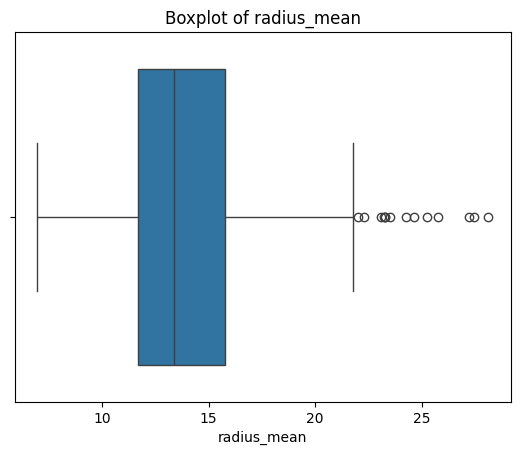

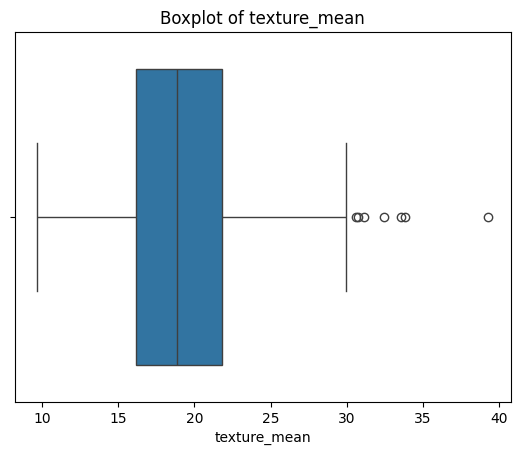

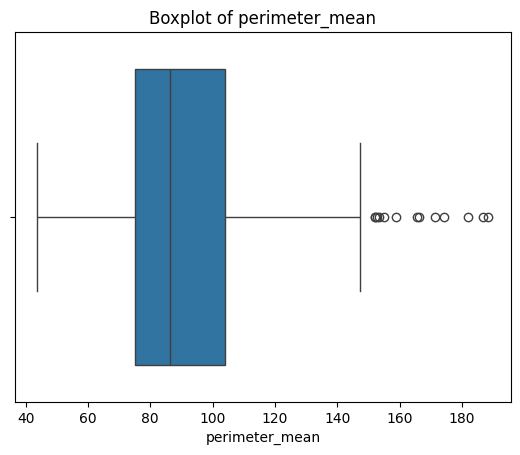

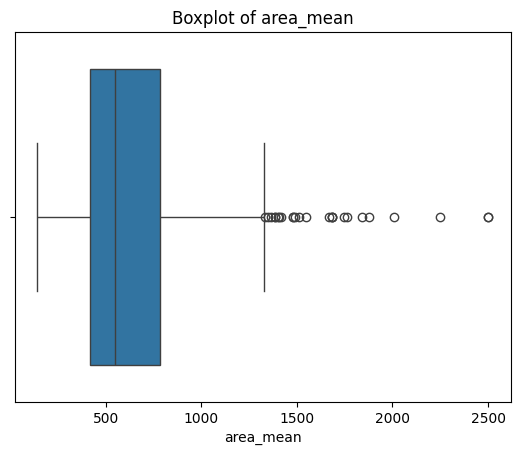

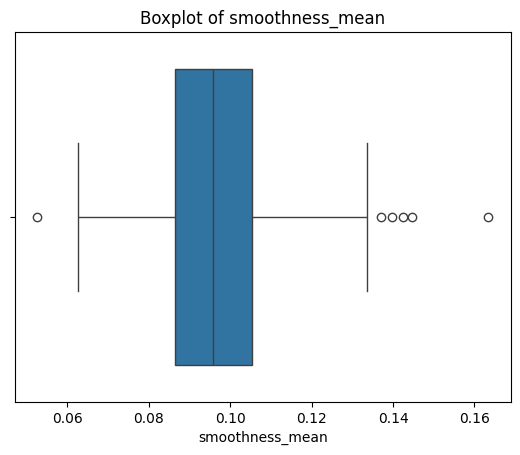

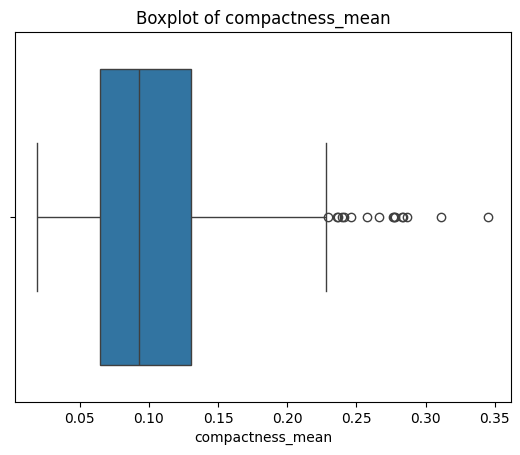

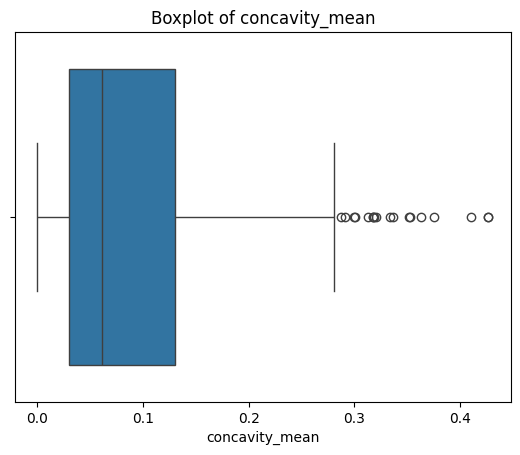

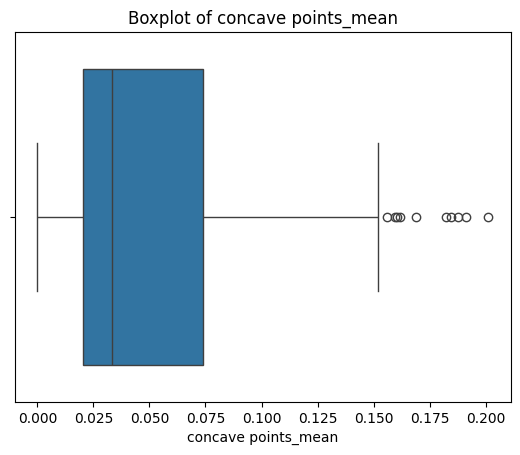

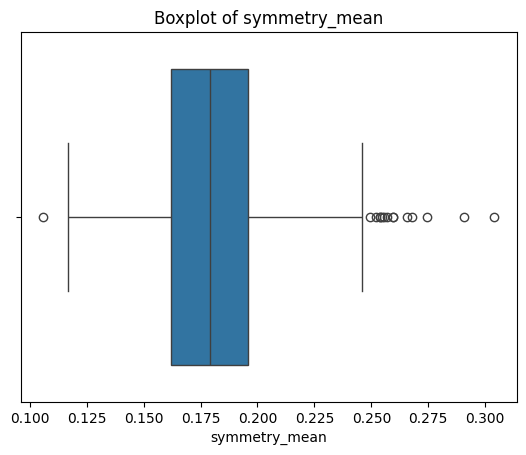

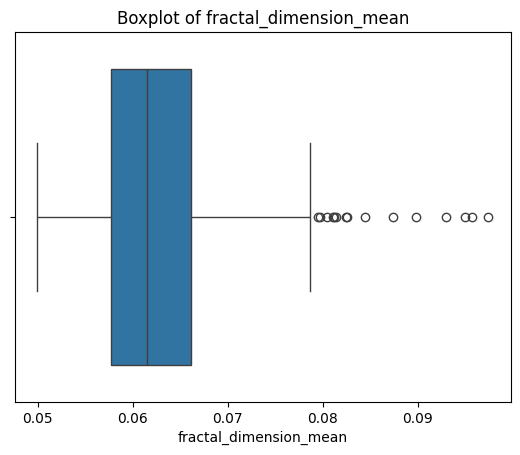

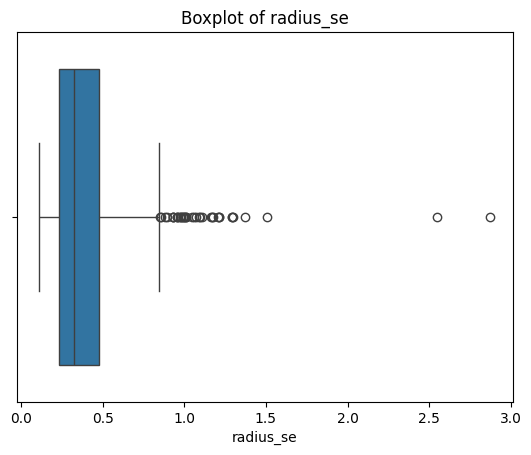

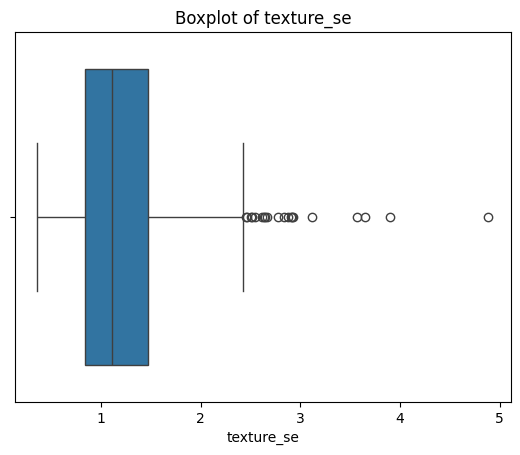

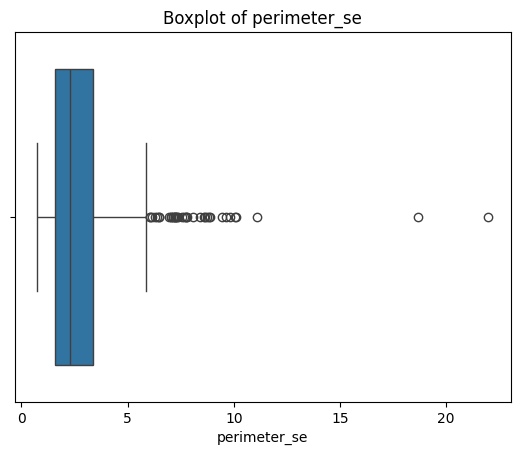

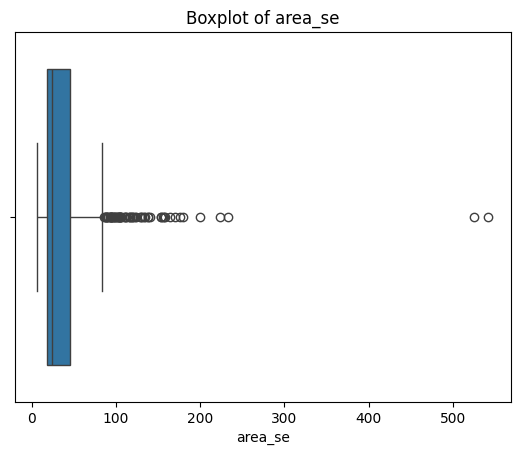

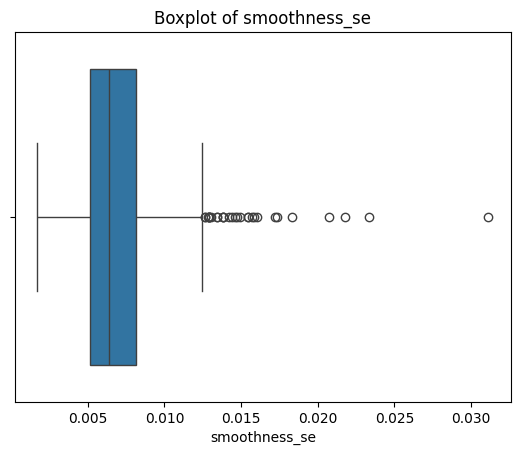

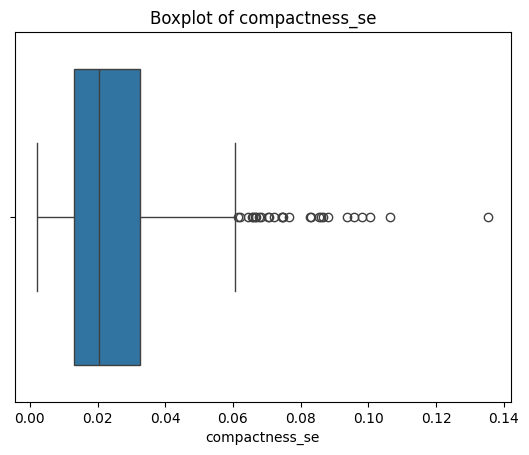

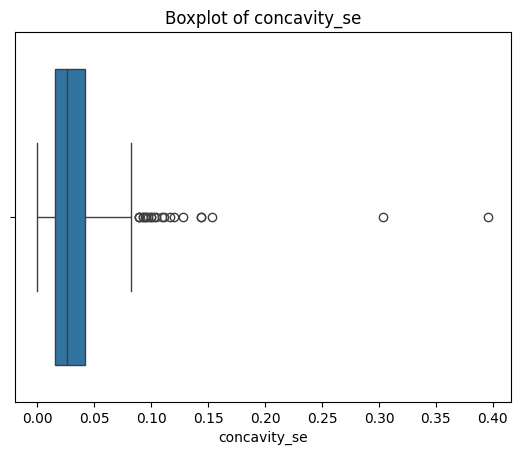

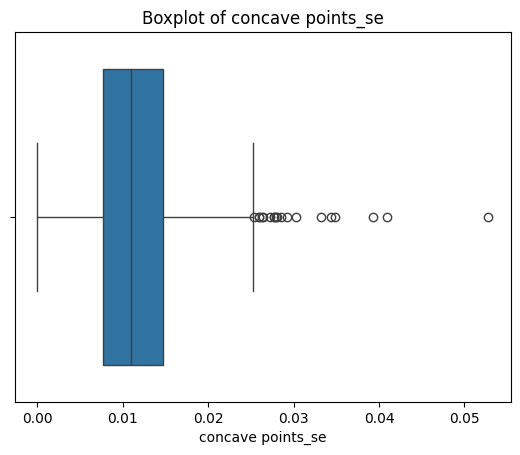

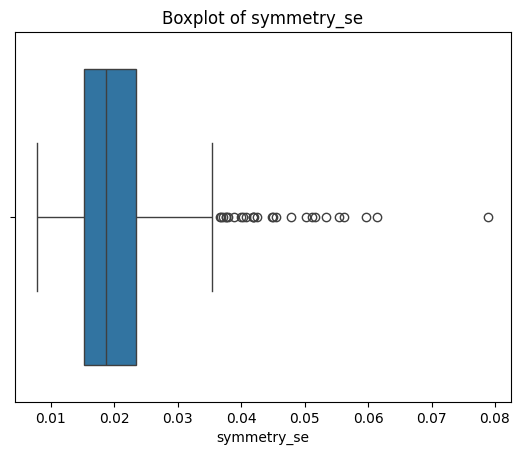

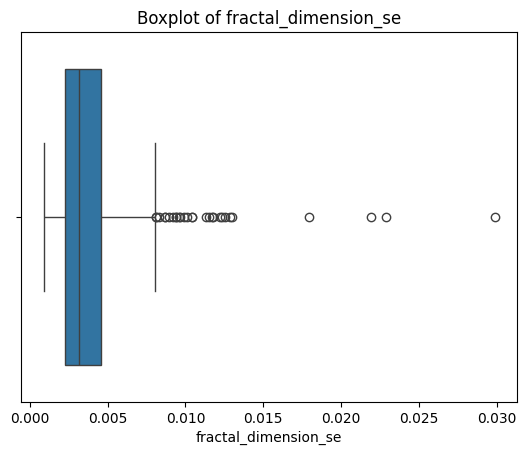

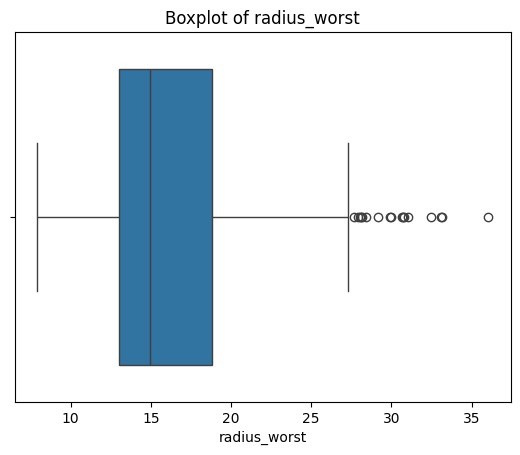

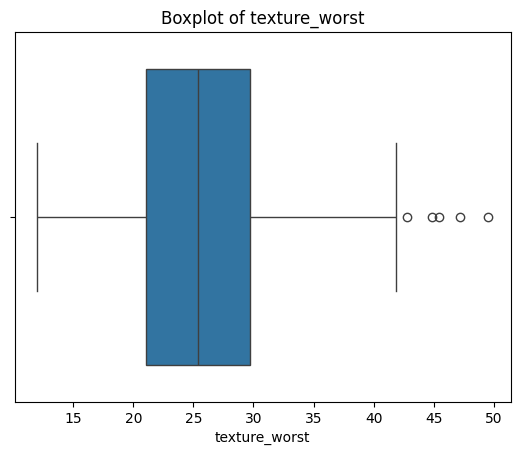

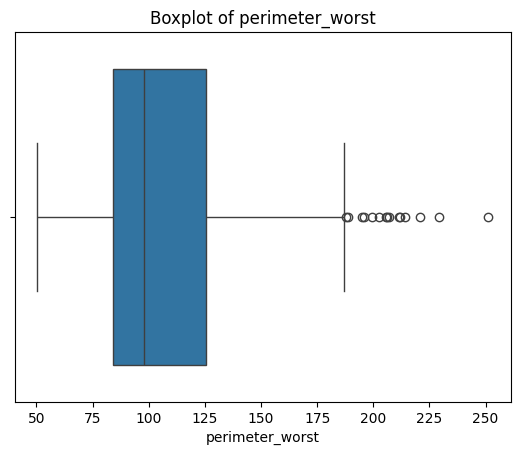

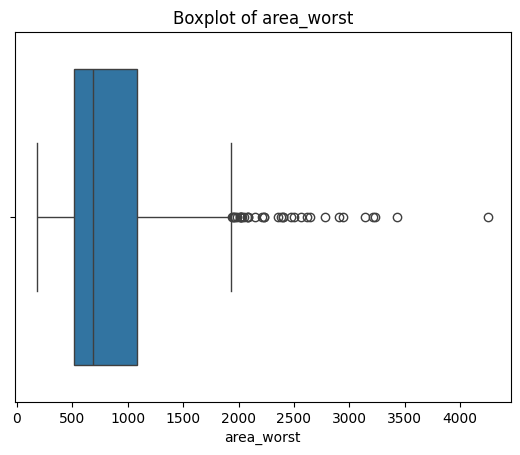

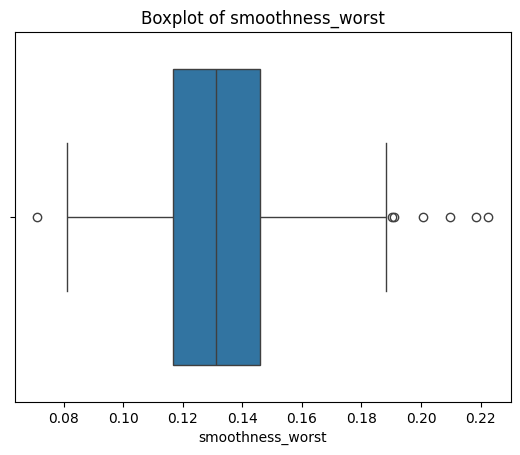

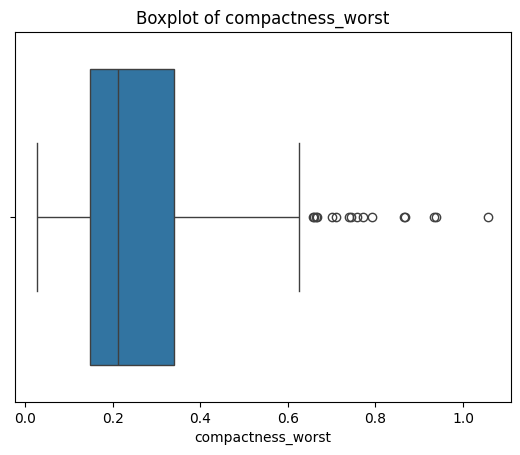

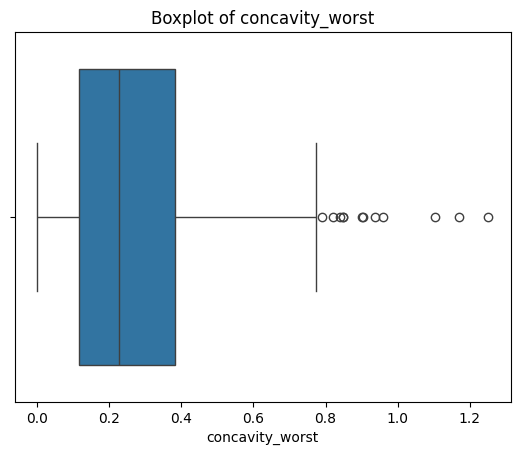

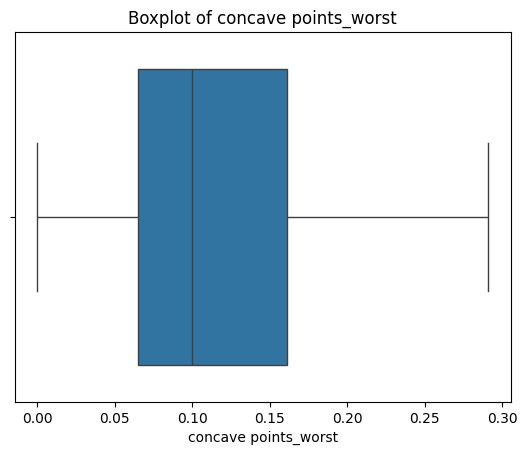

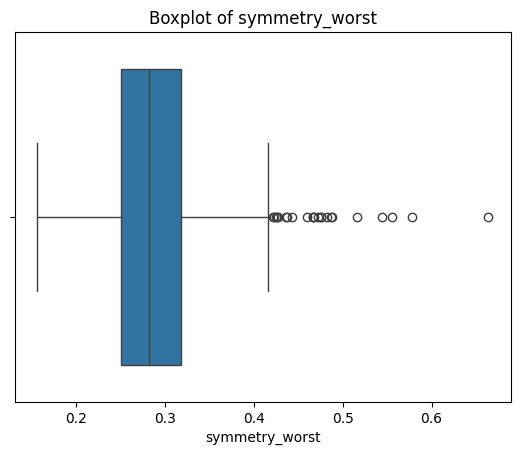

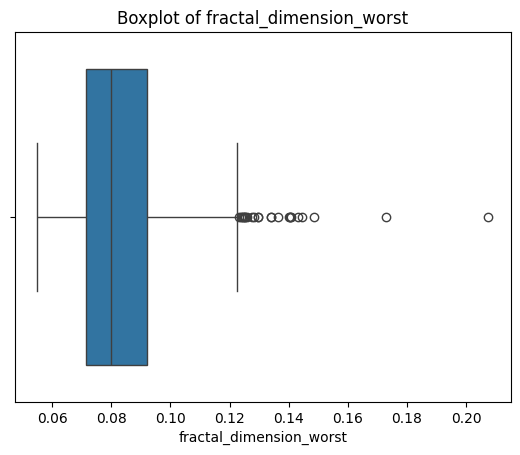

In [11]:
#checking for outliers
def plot_boxplots(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    for column in columns:
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

plot_boxplots(data)

In [12]:
def count_outliers(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    outlier_counts = {}
    all_outlier_rows = set()
    
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        all_outlier_rows.update(outliers.index)
    
    return outlier_counts, all_outlier_rows


outlier_counts, outlier_rows = count_outliers(data)

for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


In [13]:
print(f"\nTotal number of rows containing at least one outlier: {len(outlier_rows)}")
print(f"Percentage of dataset with outliers: {len(outlier_rows)/len(data)*100:.2f}%")


Total number of rows containing at least one outlier: 171
Percentage of dataset with outliers: 30.05%


<Axes: >

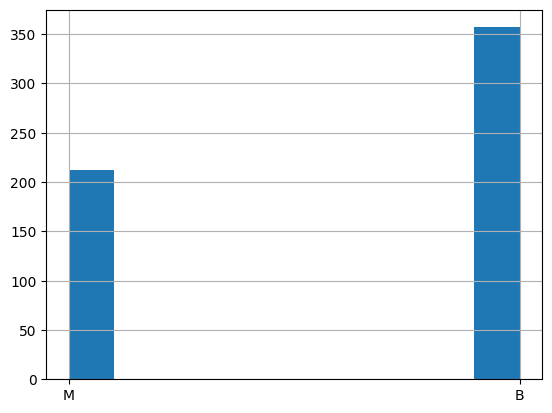

In [14]:
data["diagnosis"].hist()

In [15]:
def remove_outliers(data, columns=None):
    # Make a copy of the original data
    clean_data = data.copy()
    
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    print(f"Original data shape: {data.shape}")
    
    # Keep track of rows to remove
    rows_to_drop = set()
    outlier_counts = {}
    
    for column in columns:
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find indices of outliers
        outlier_indices = clean_data[(clean_data[column] < lower_bound) | 
                                    (clean_data[column] > upper_bound)].index
        
        # Add these indices to our set
        rows_to_drop.update(outlier_indices)
        
        # Count outliers per column
        outlier_counts[column] = len(outlier_indices)
    
    # Remove all rows with outliers
    clean_data = clean_data.drop(list(rows_to_drop))
    
    print(f"Number of rows with outliers: {len(rows_to_drop)}")
    print(f"Cleaned data shape: {clean_data.shape}")
    # print("\nOutliers per column:")
    # for column, count in outlier_counts.items():
    #     print(f"{column}: {count} outliers")
    
    return clean_data

# Call the function
clean_data = remove_outliers(data)

Original data shape: (569, 31)
Number of rows with outliers: 171
Cleaned data shape: (398, 31)


In [16]:
#Mapping the values in the Target Feature
#make the B 0 and the M 1 for the target feature 
data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)

C:\Users\Maryl\AppData\Local\Temp\ipykernel_3084\2512708338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)
C:\Users\Maryl\AppData\Local\Temp\ipykernel_3084\2512708338.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis

<Axes: >

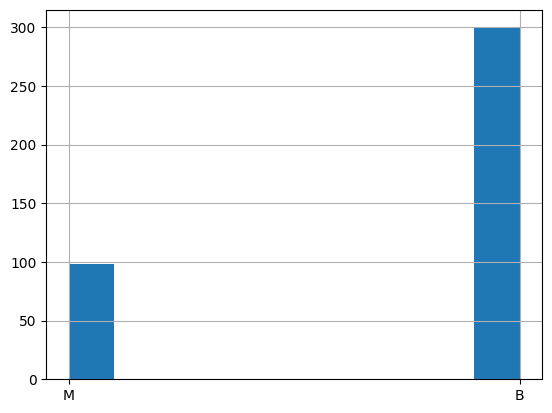

In [17]:
clean_data["diagnosis"].hist()

Removing the ouliers will remove the malignant rows, I will keep the outliers.

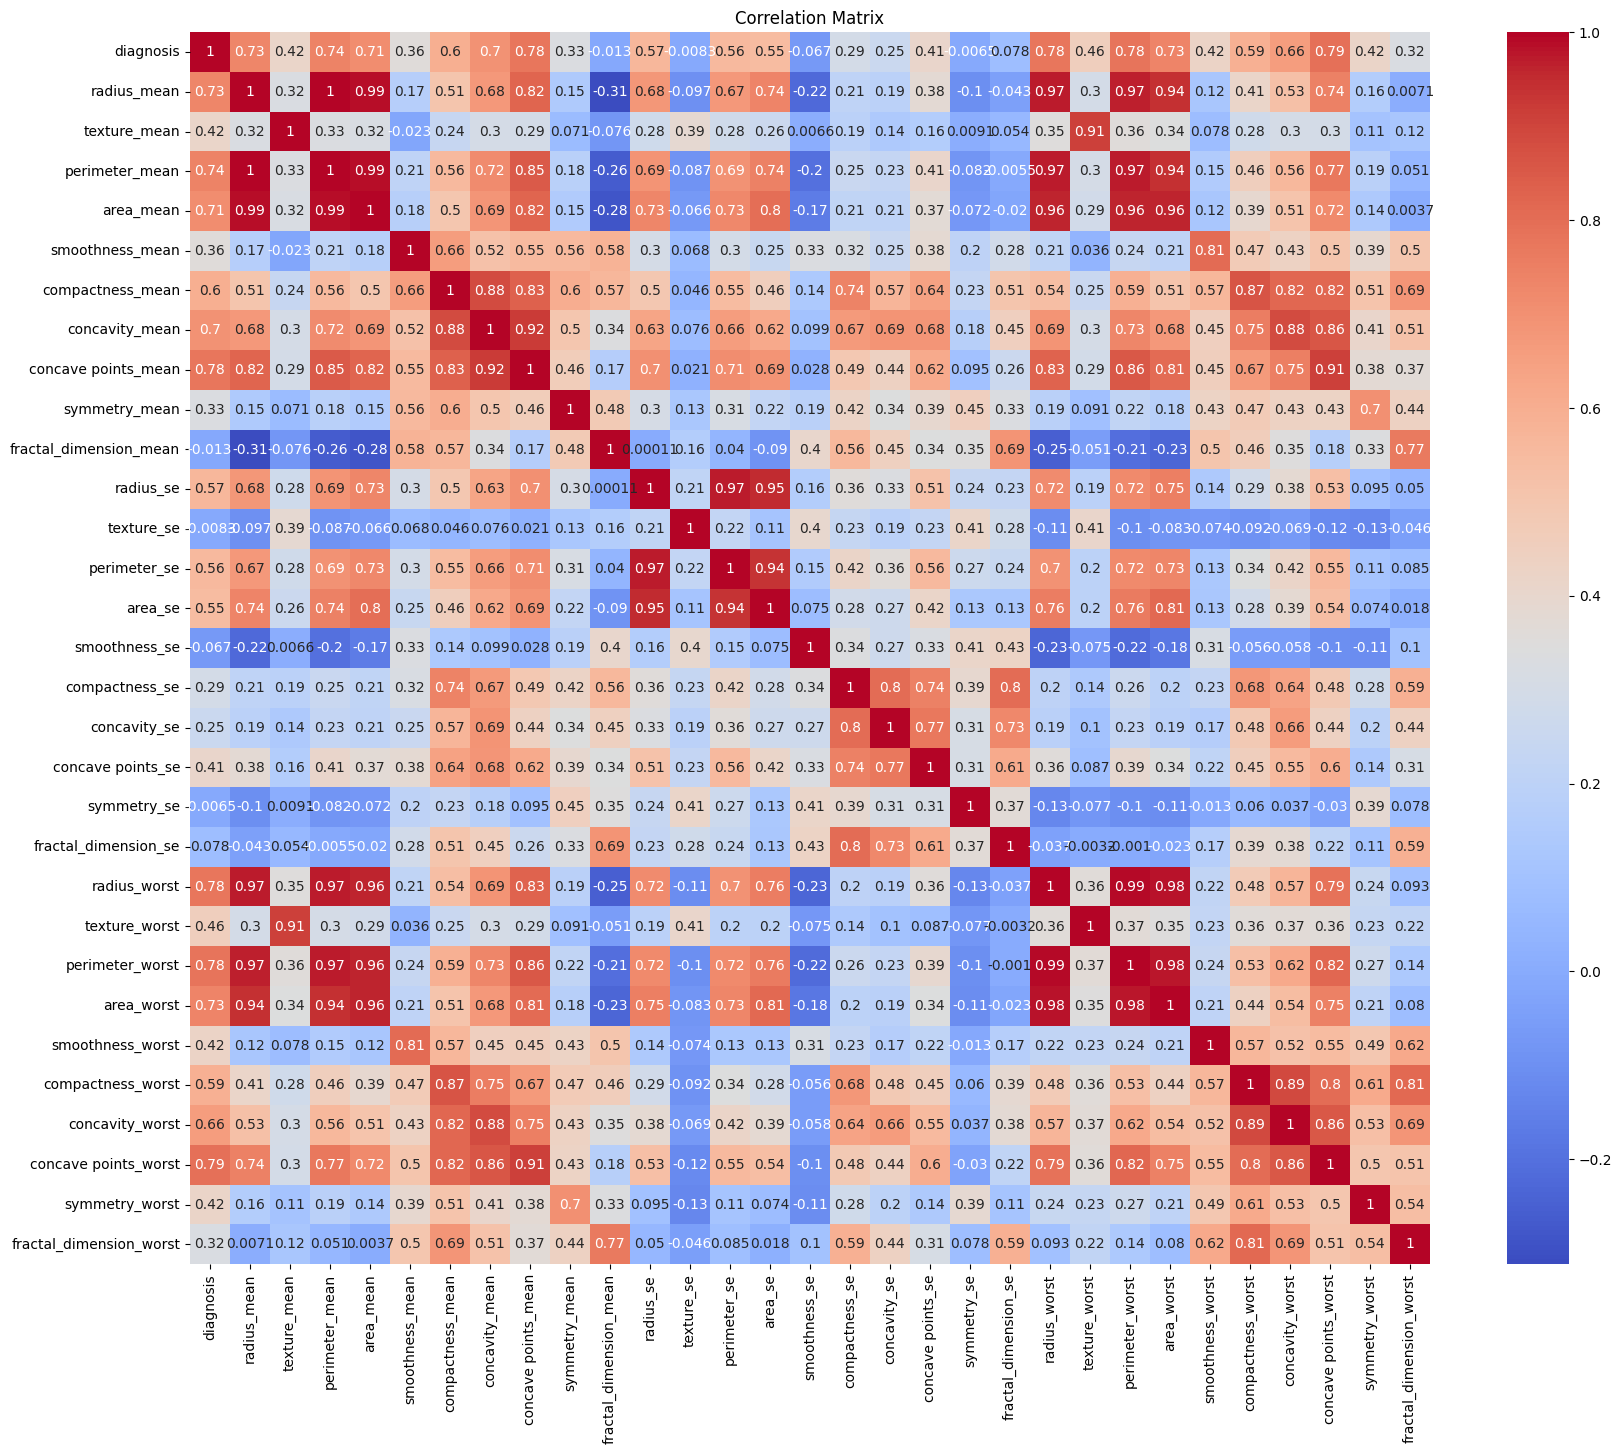

In [18]:
#Correlation Matix
matrix = data.corr()

# axis_corr = sns.heatmap(
#     data,
#     vmin = -1, vmax = 1, center =0,
#     cmap=sns.diverging_palette(50, 500, n=500),
#     square=True
# )
# plt.show()

dataframe = pd. DataFrame(data=data, columns=data.columns)
matrix = dataframe.corr()
plt.figure(figsize=(20,16))
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

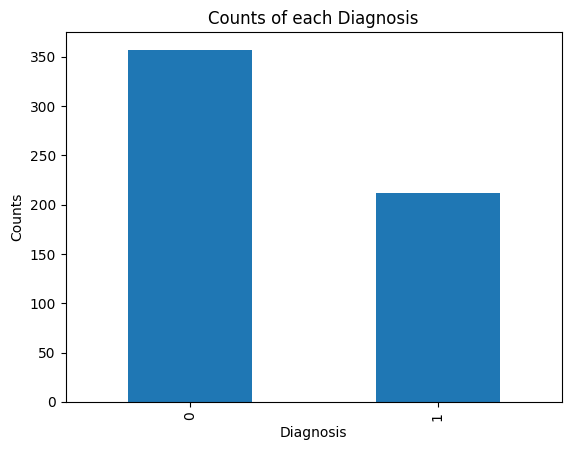

In [19]:
#bar plots for the target feature
diagnosis_counts = data["diagnosis"].value_counts()
diagnosis_counts


diagnosis_counts.plot(kind = "bar")
plt.title( "Counts of each Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Counts")
plt.show()

In [20]:
data["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

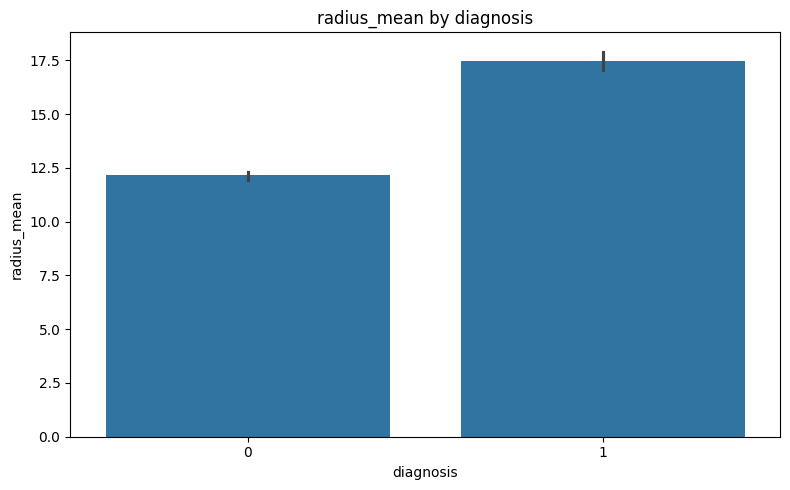

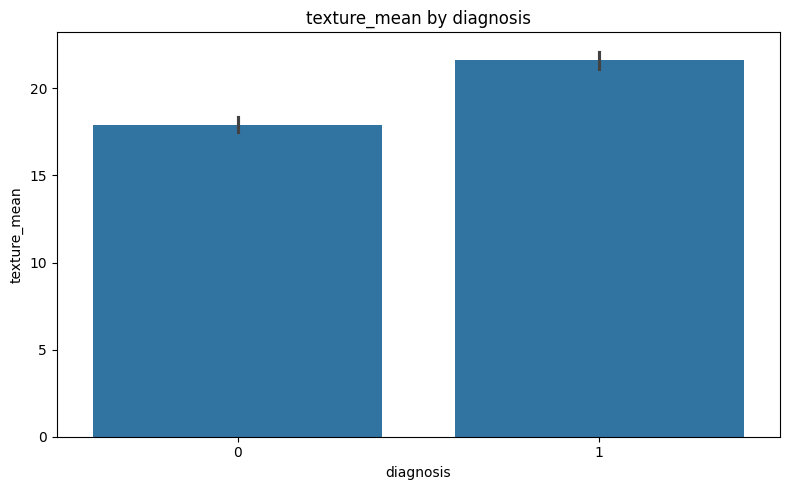

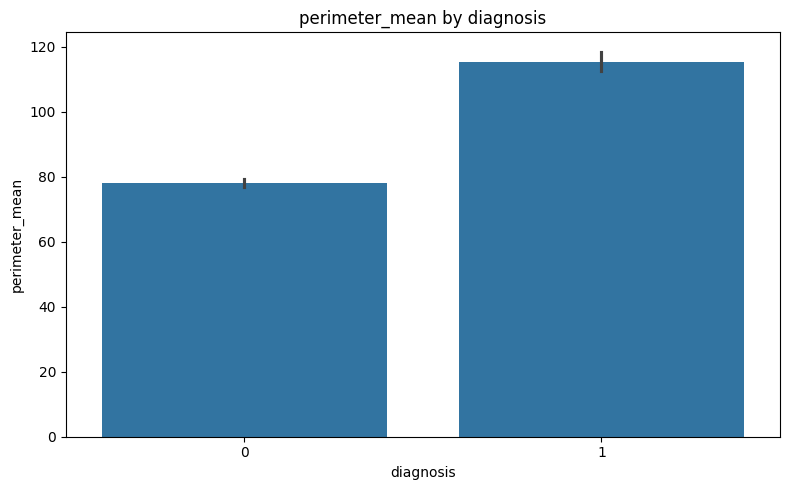

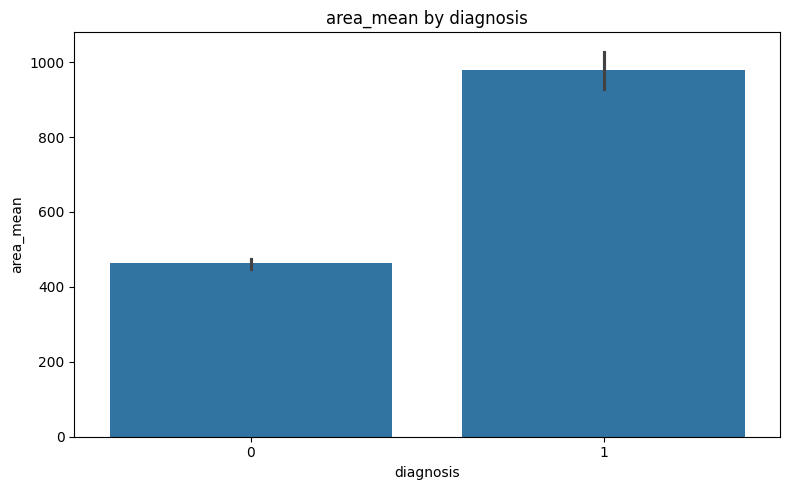

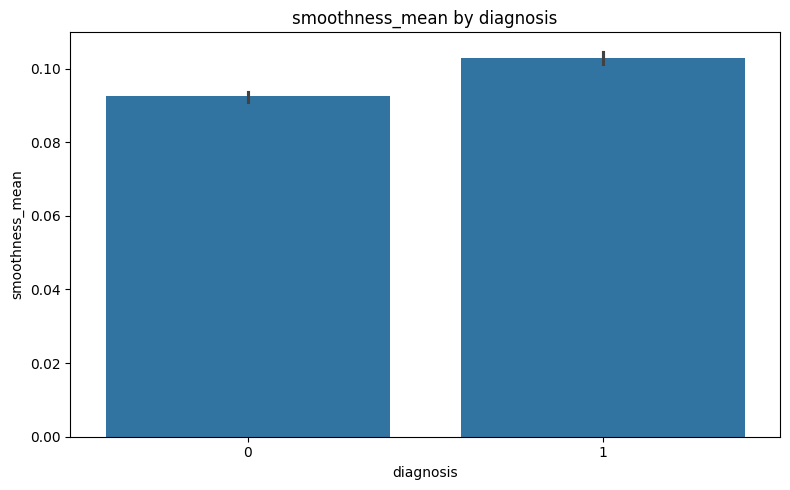

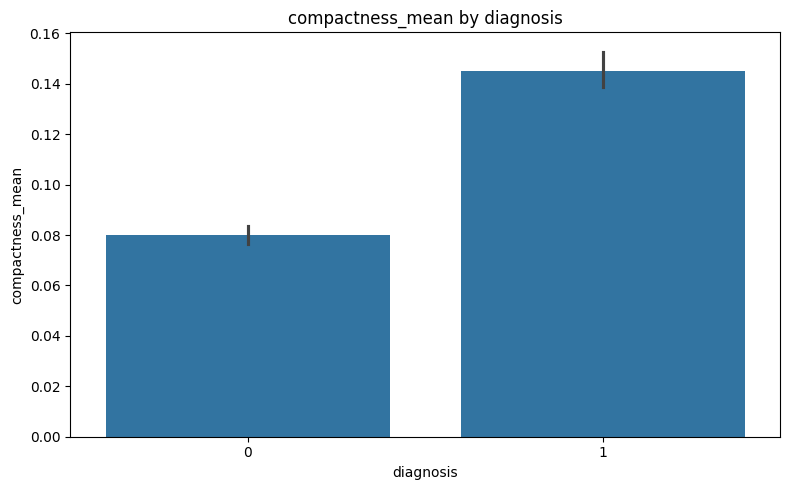

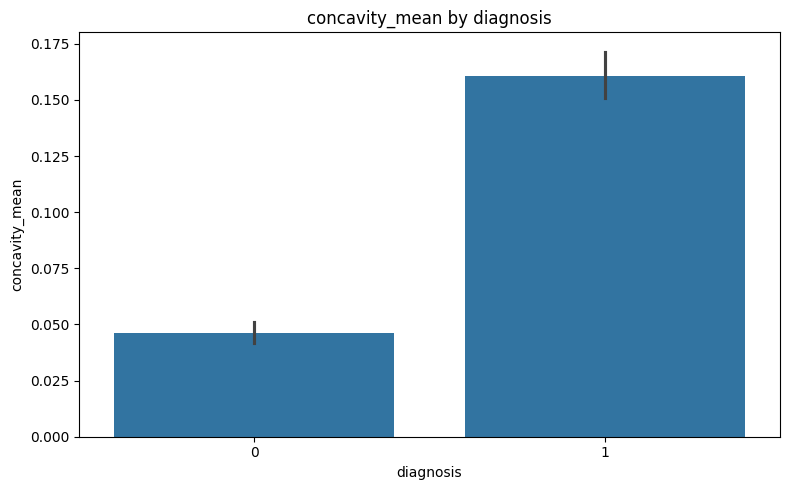

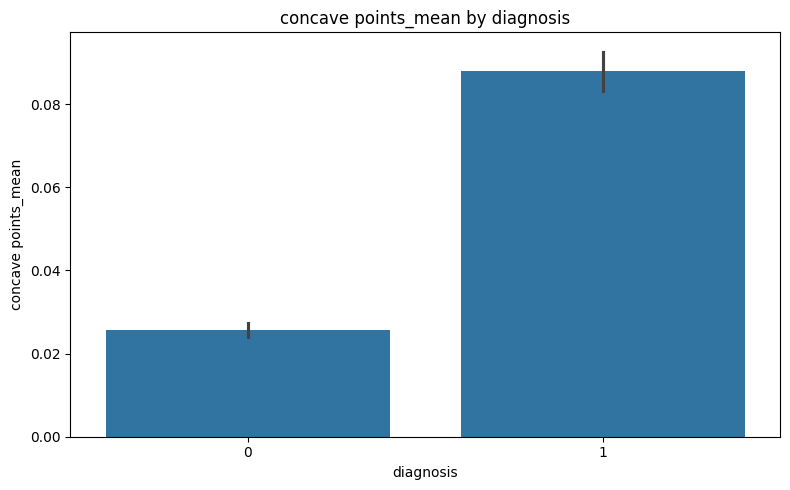

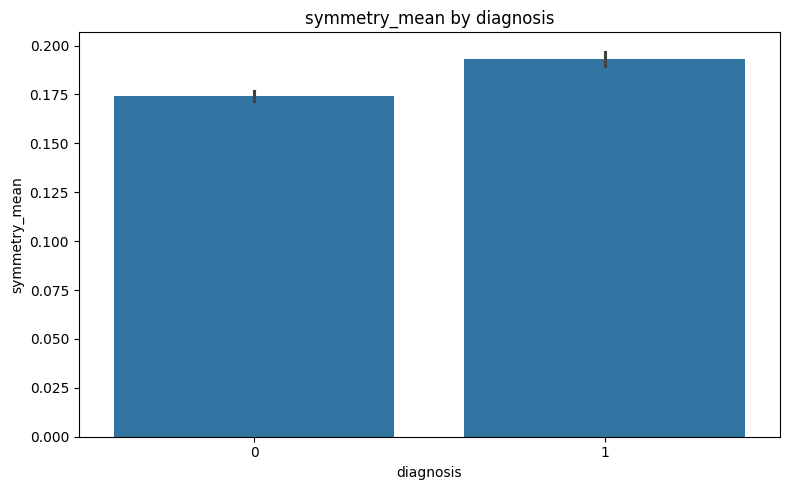

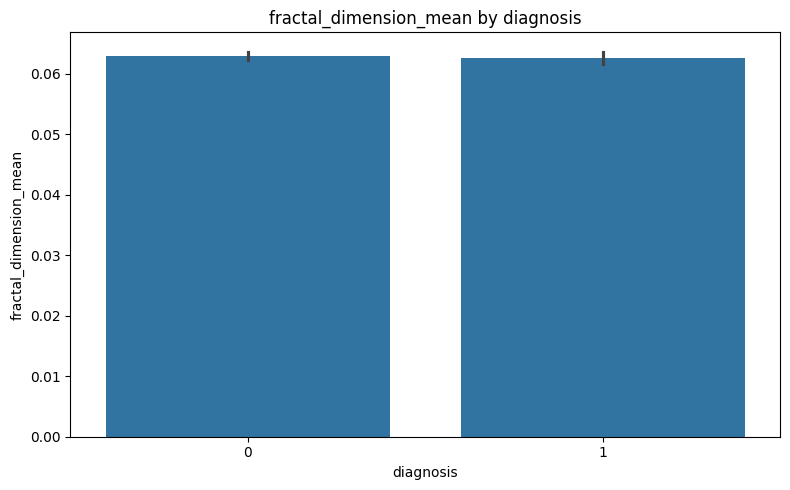

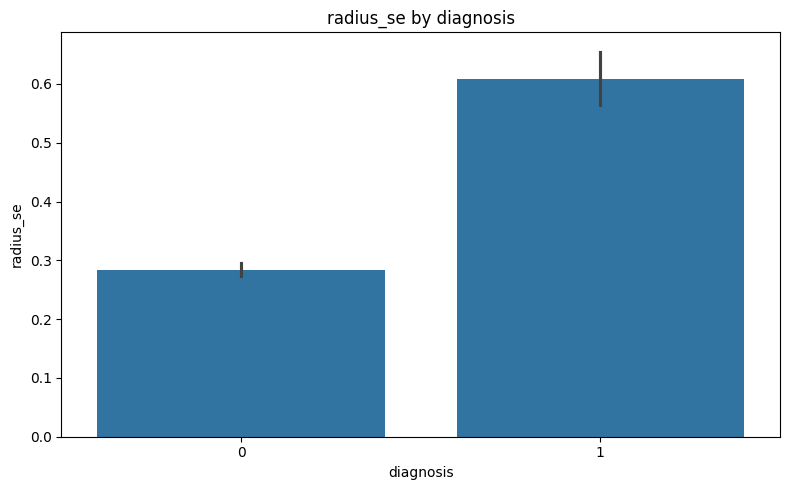

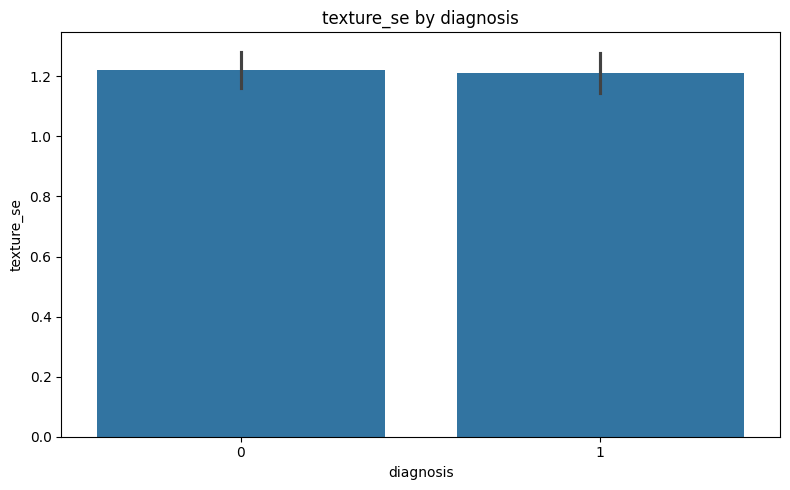

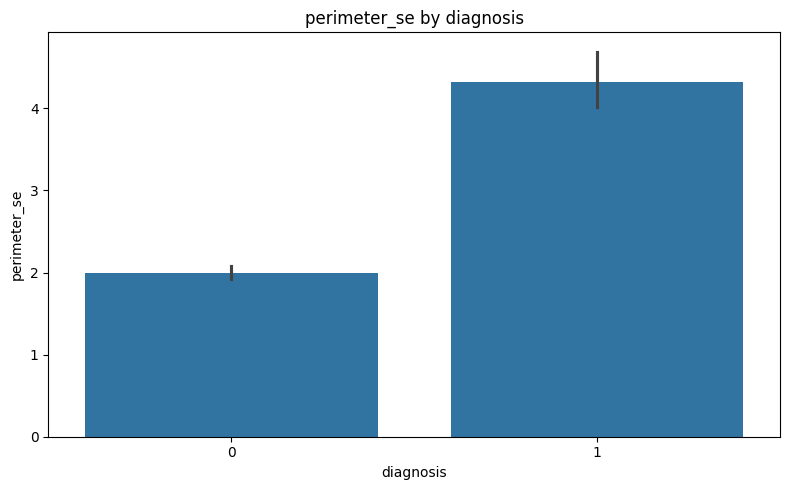

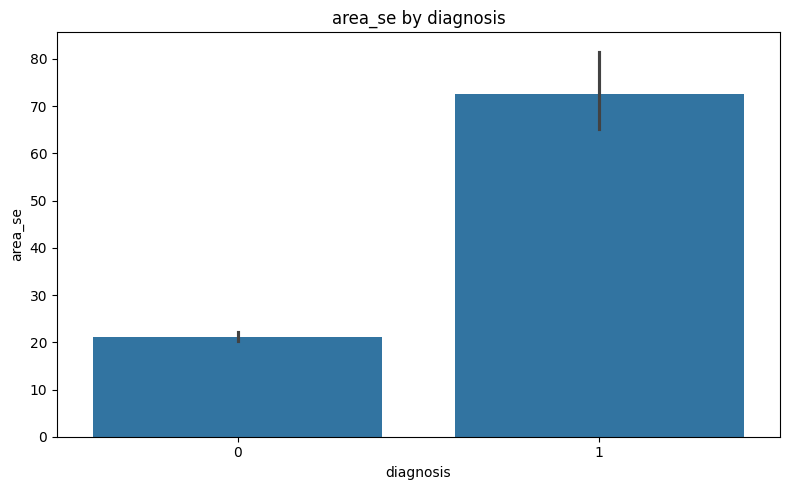

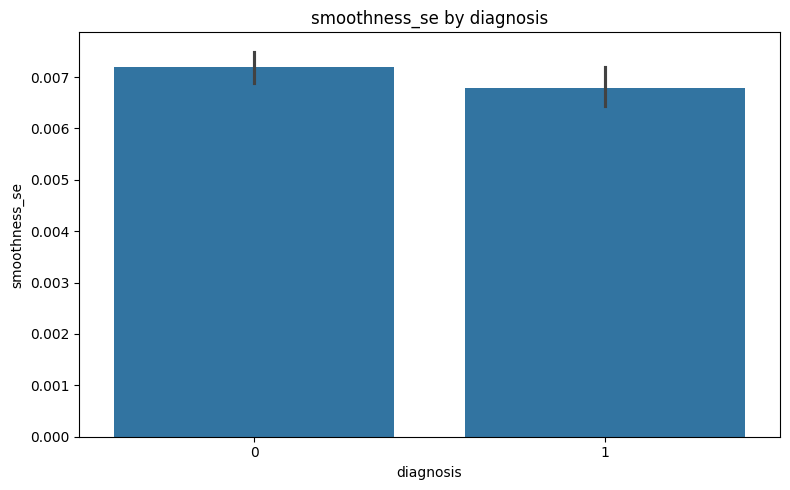

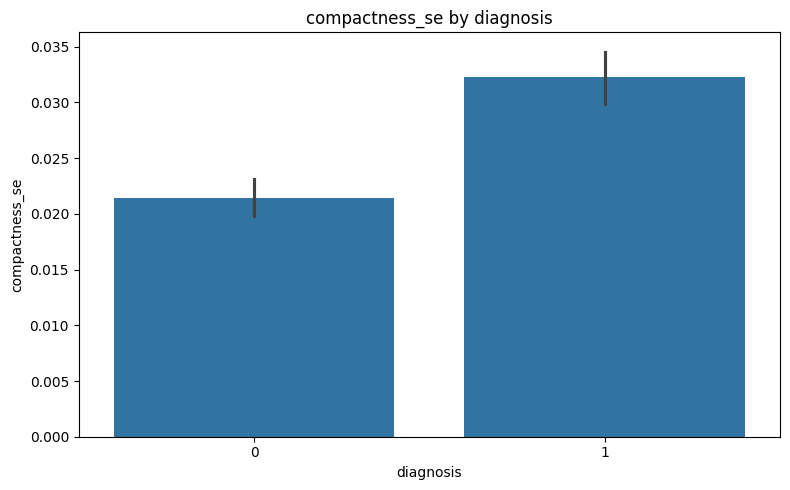

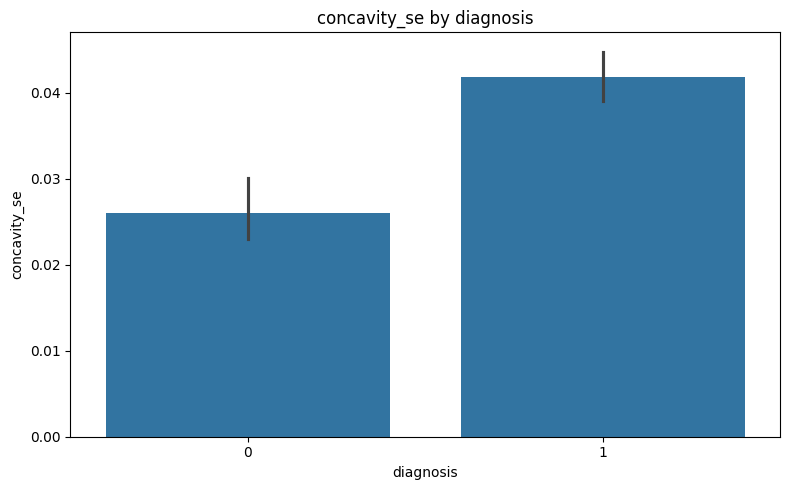

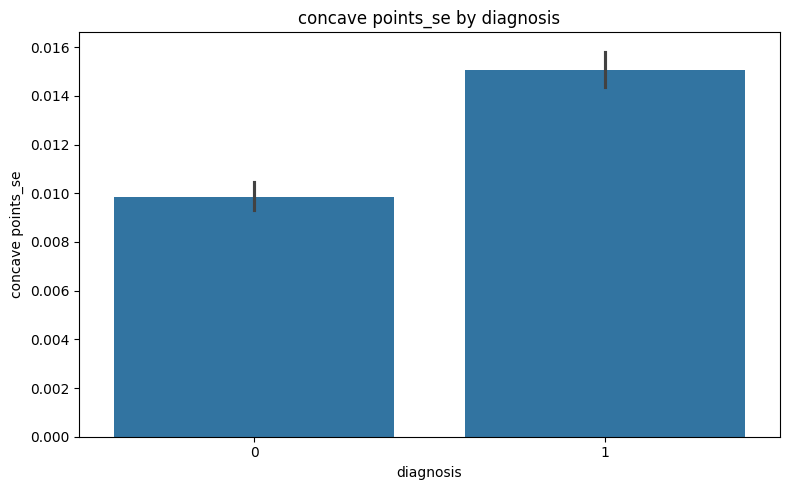

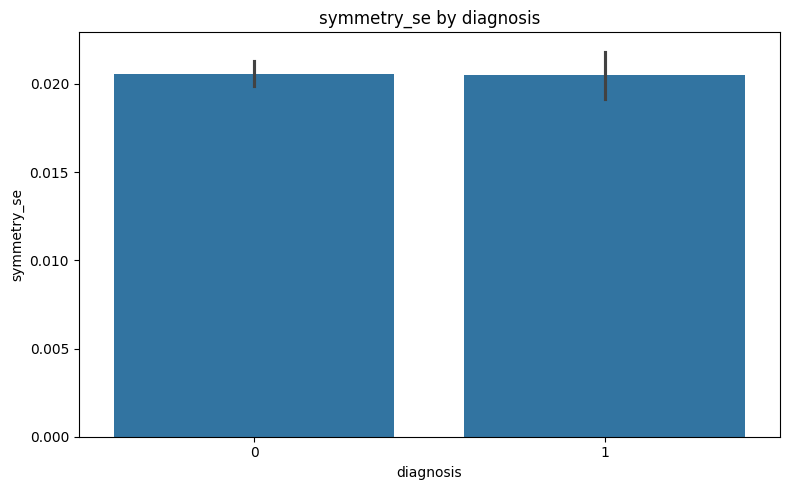

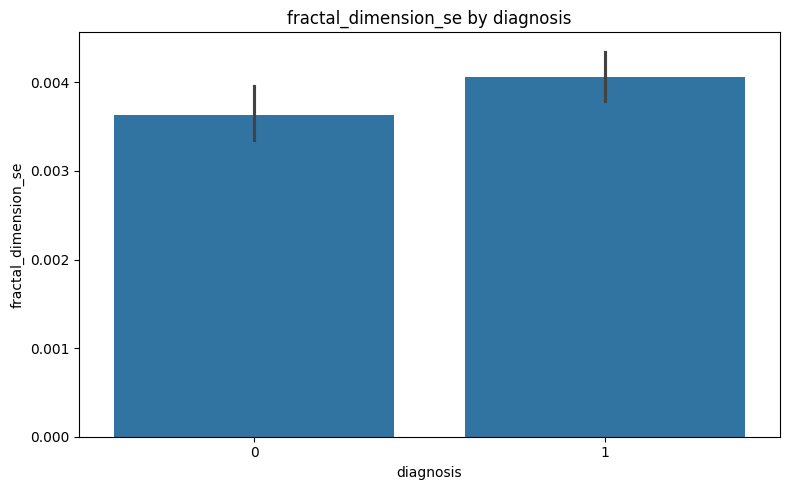

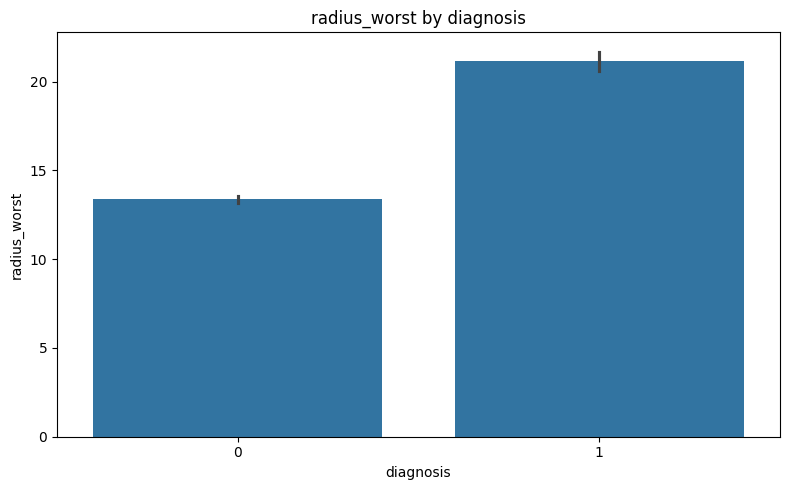

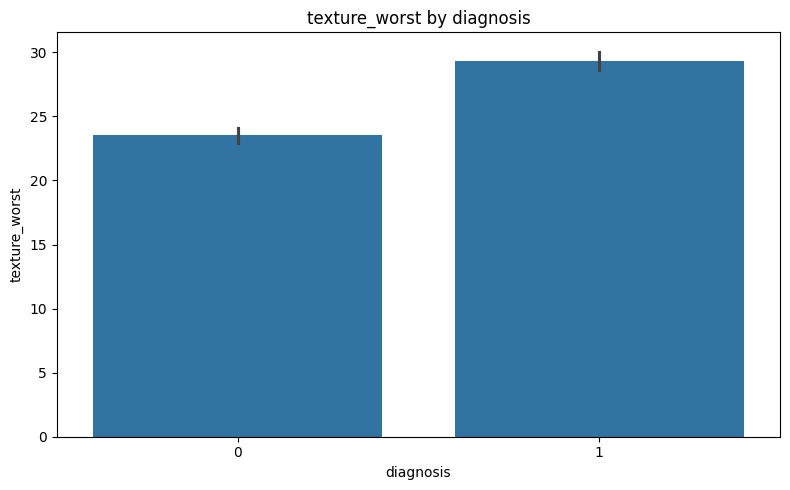

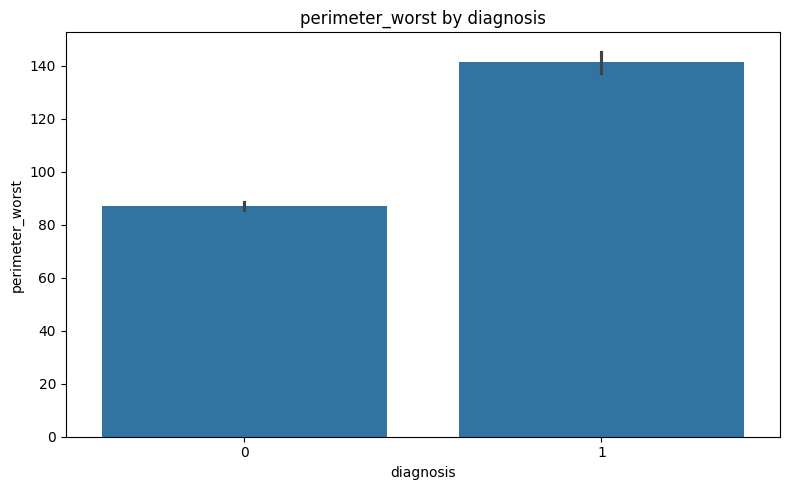

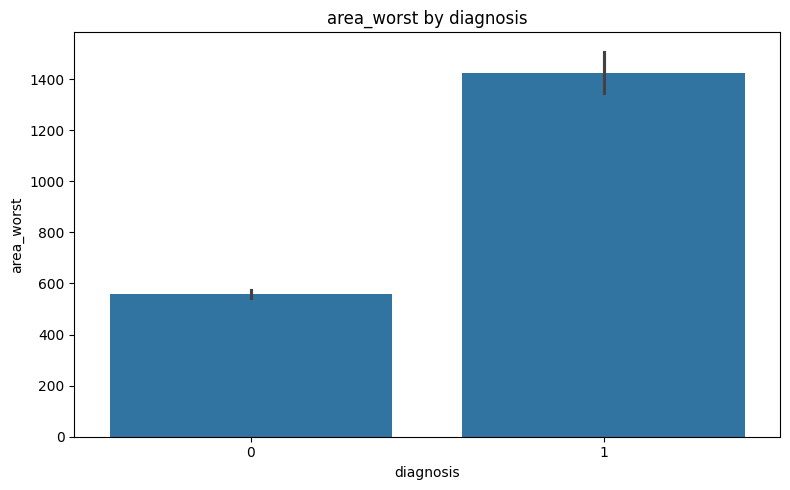

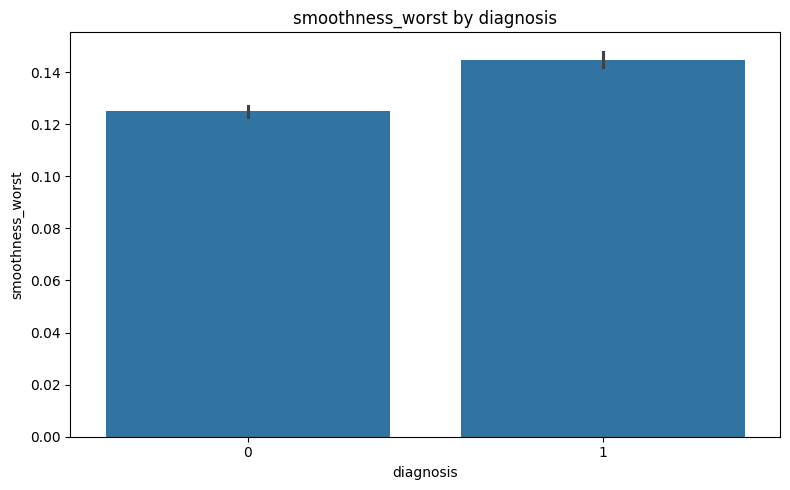

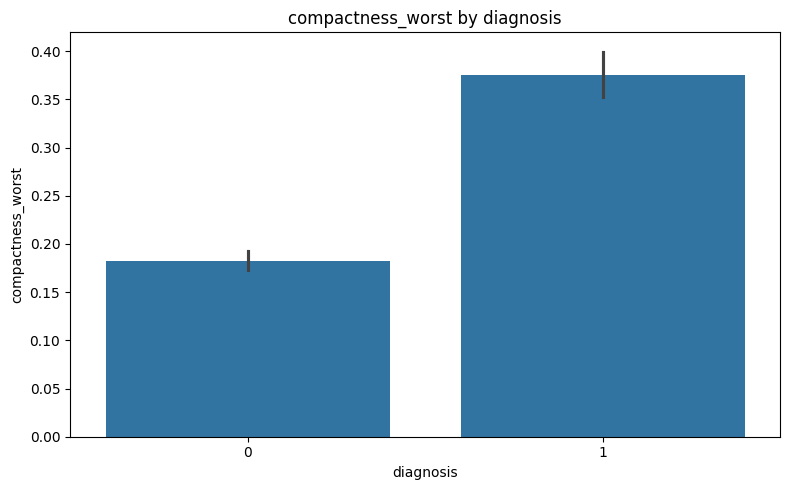

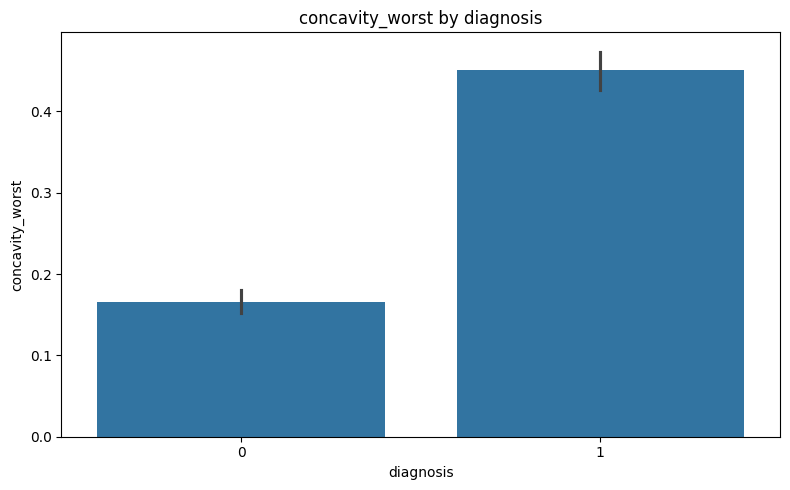

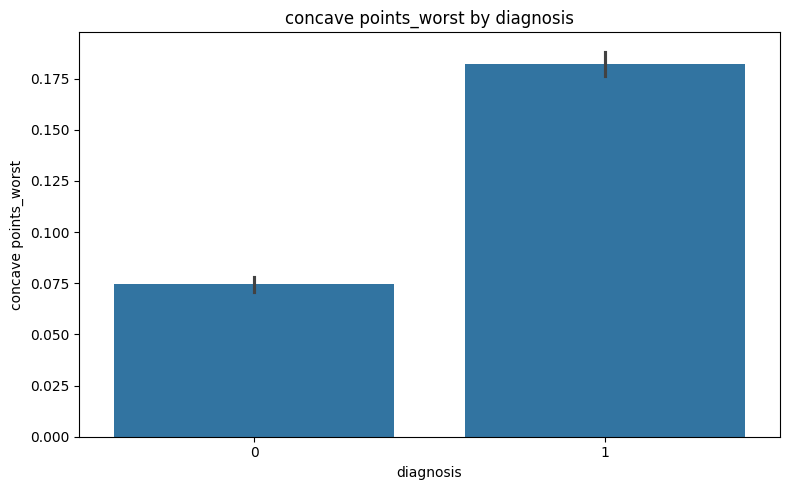

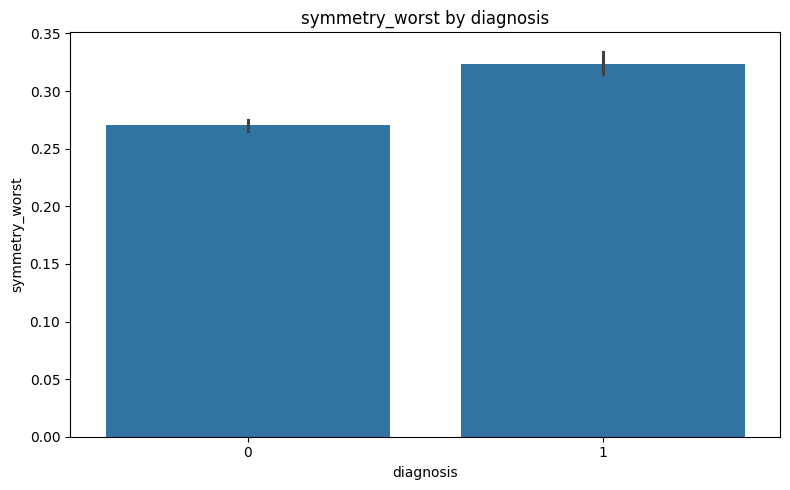

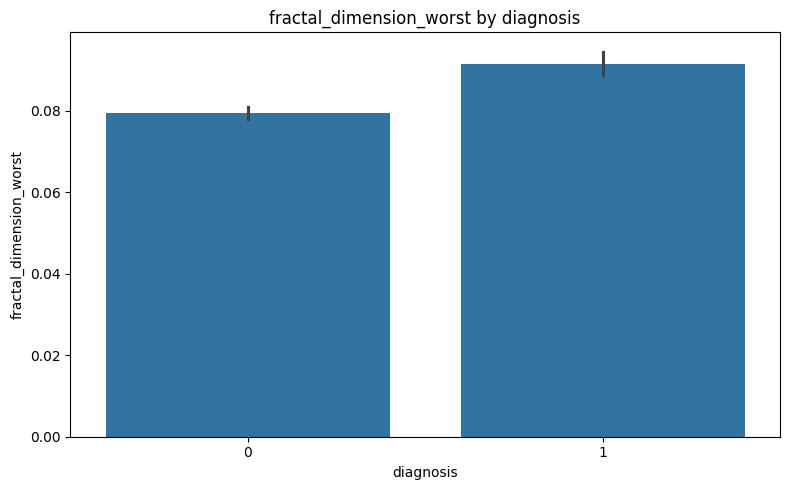

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'diagnosis' is your target column
target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create bar plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()

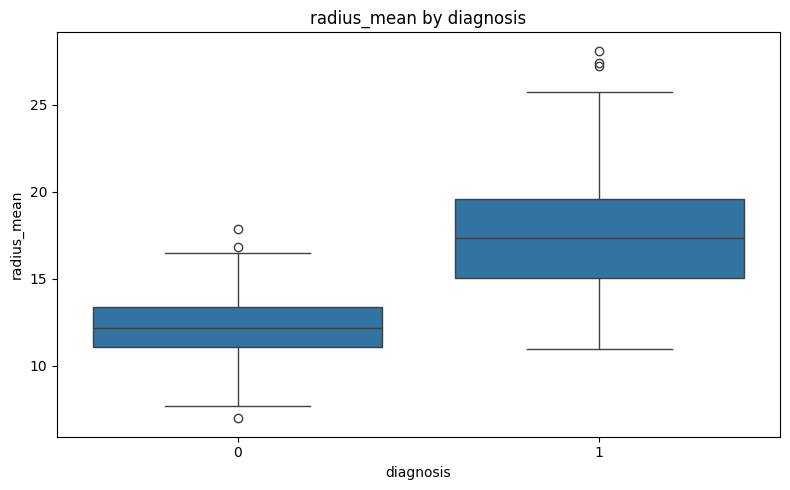

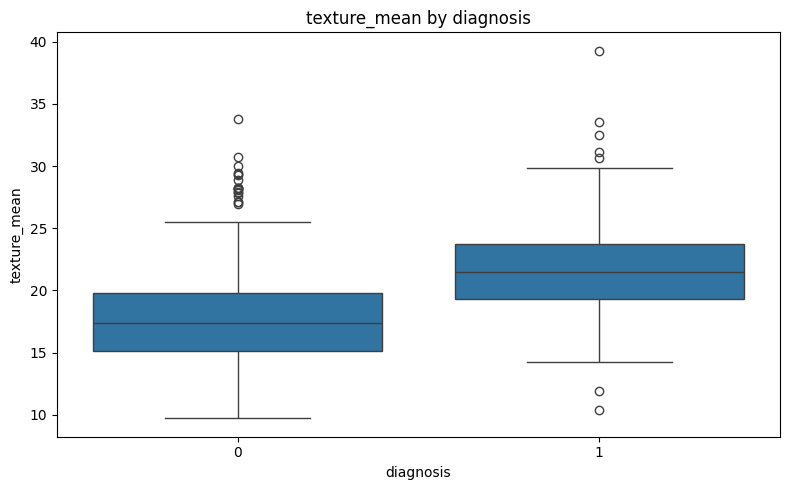

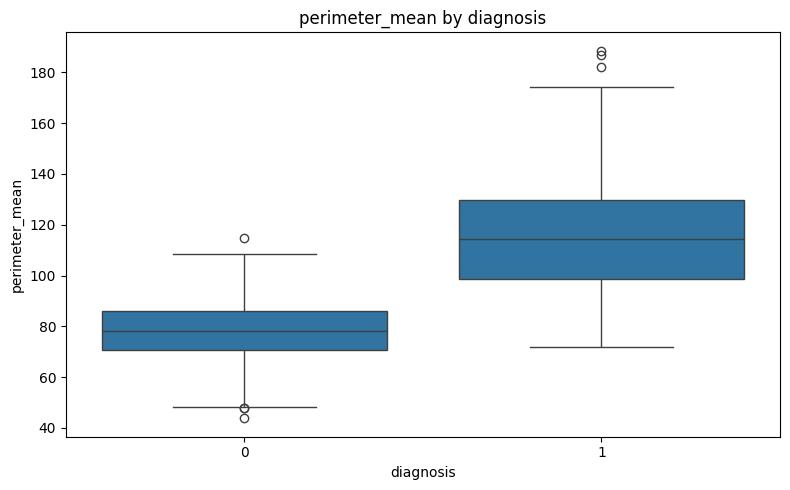

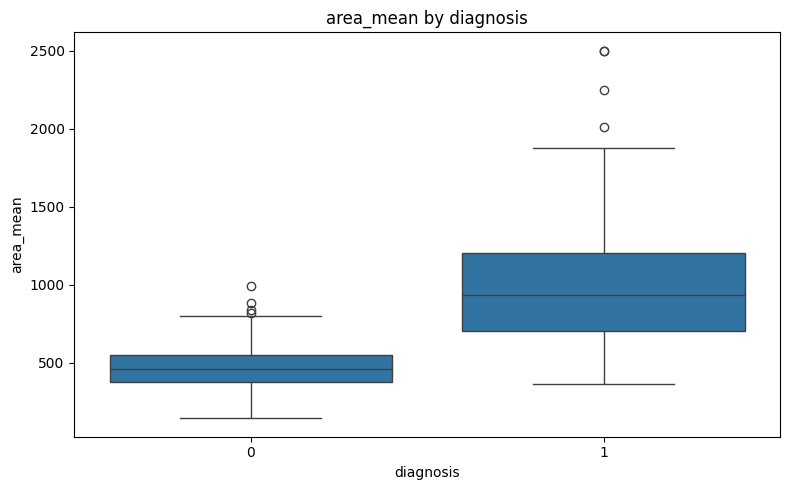

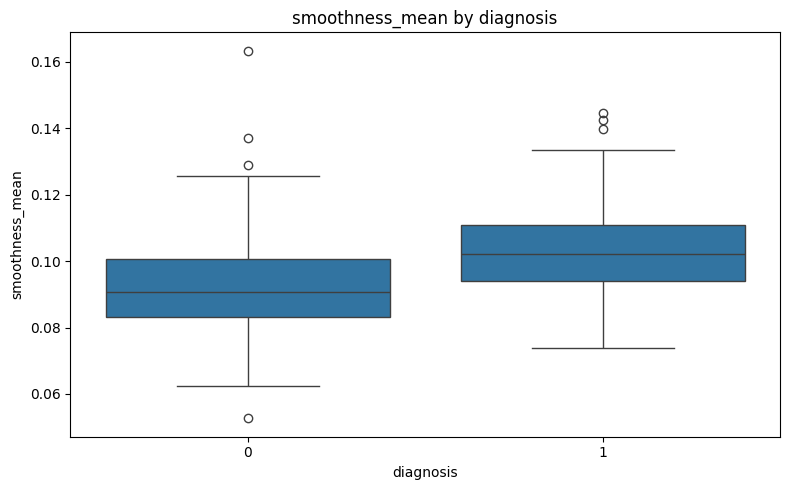

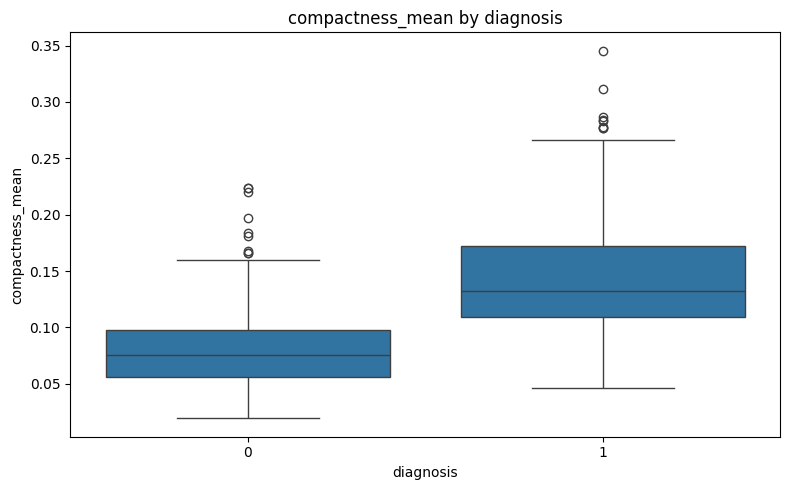

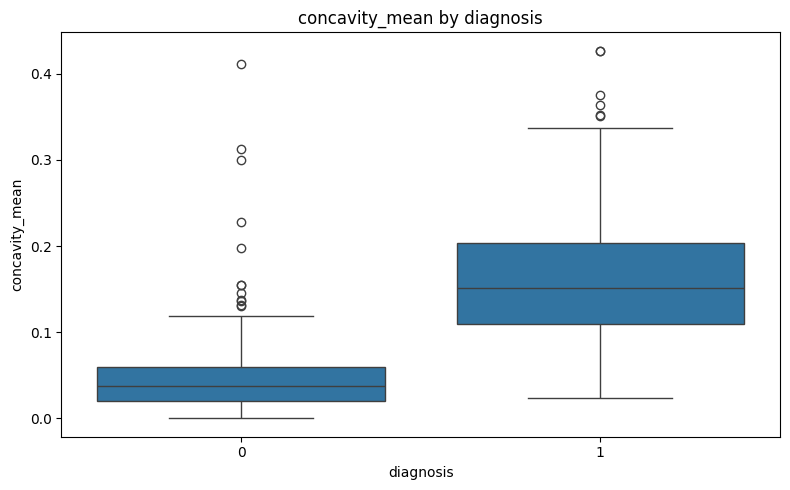

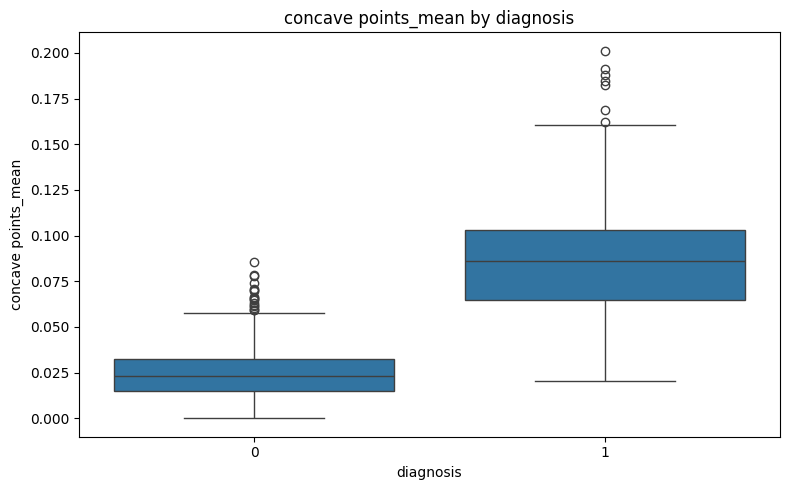

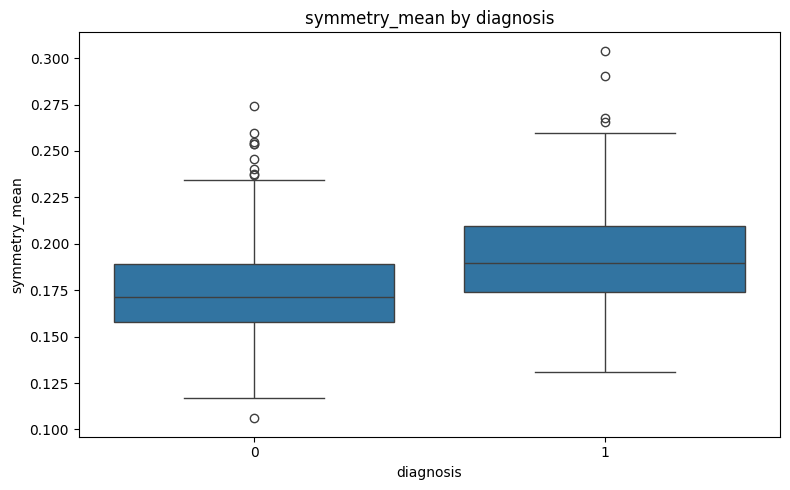

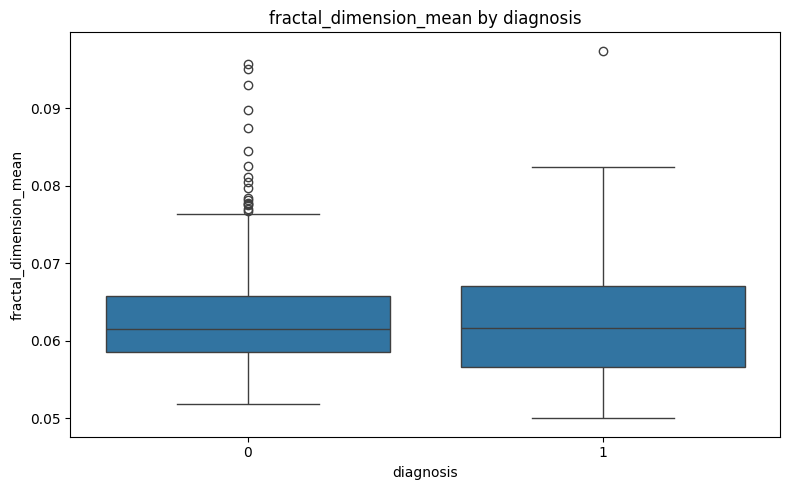

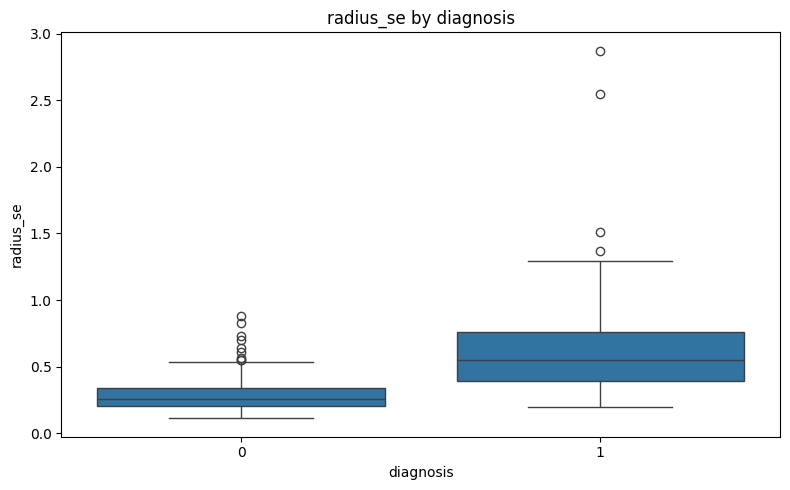

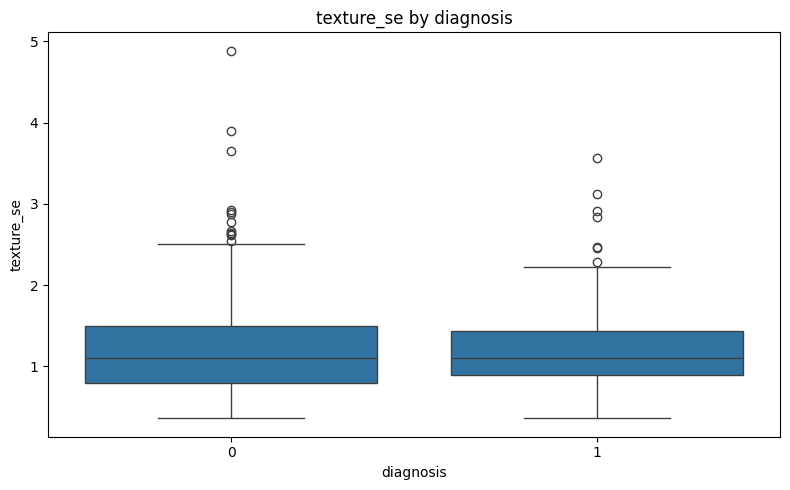

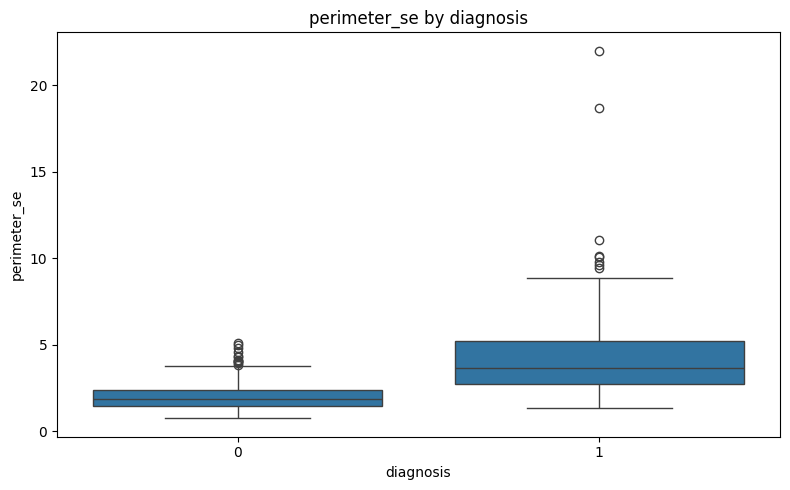

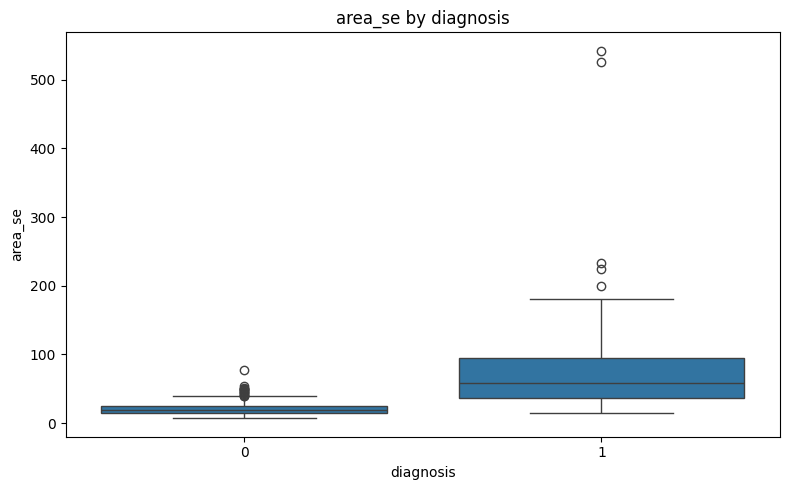

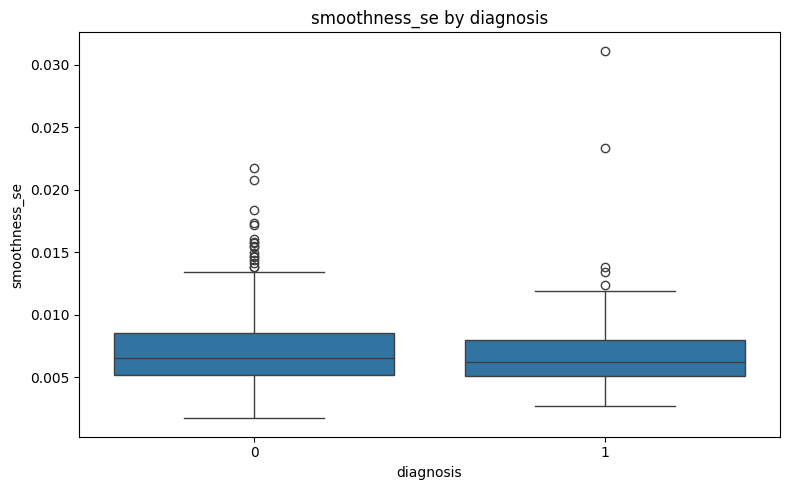

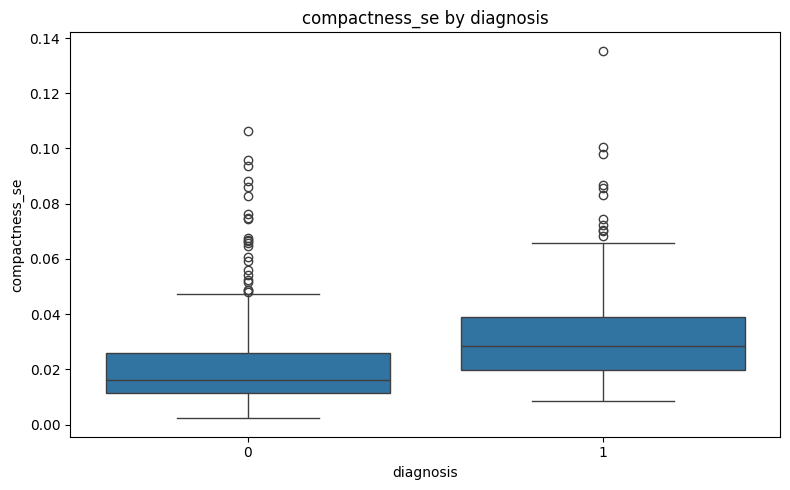

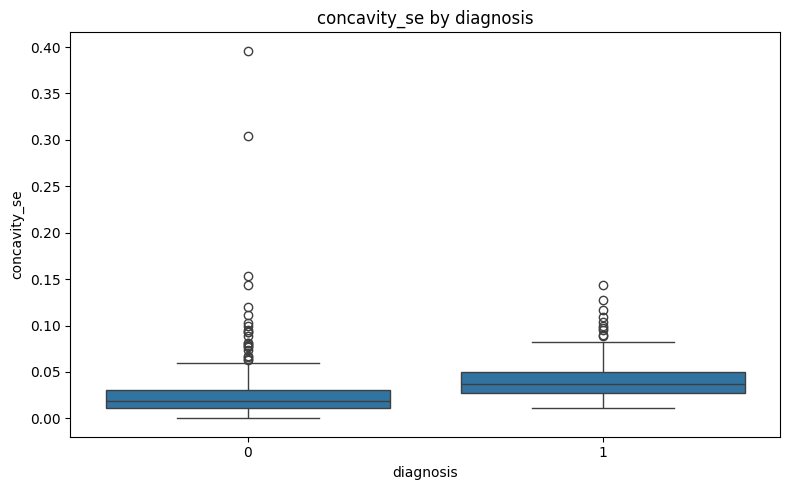

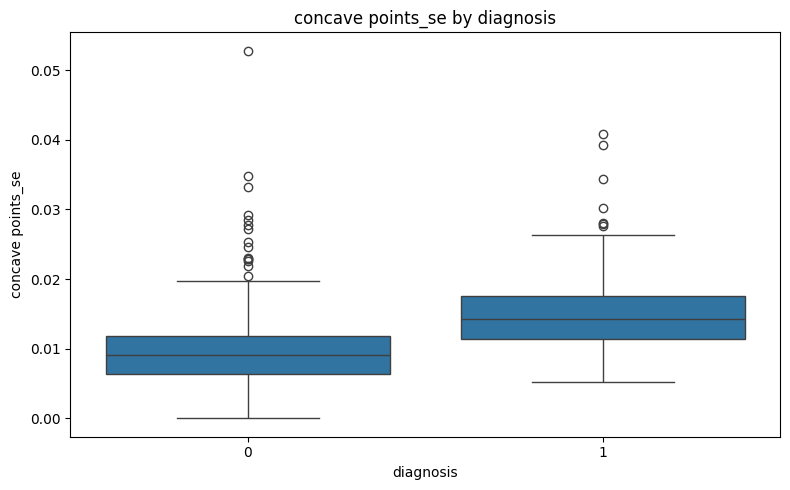

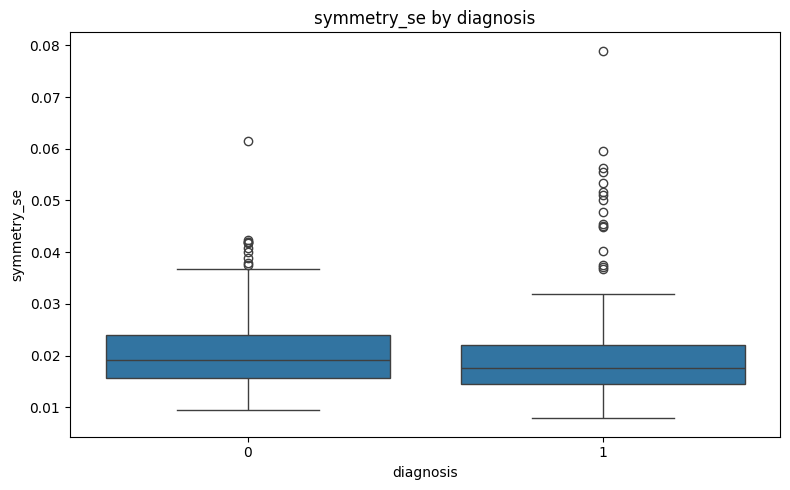

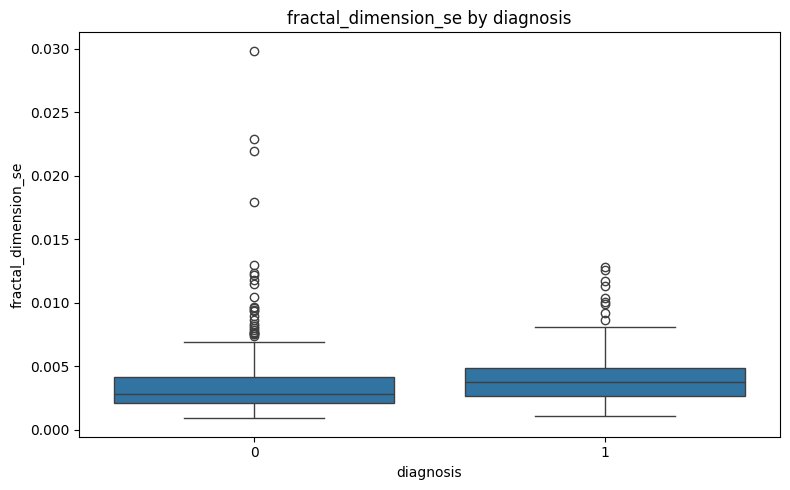

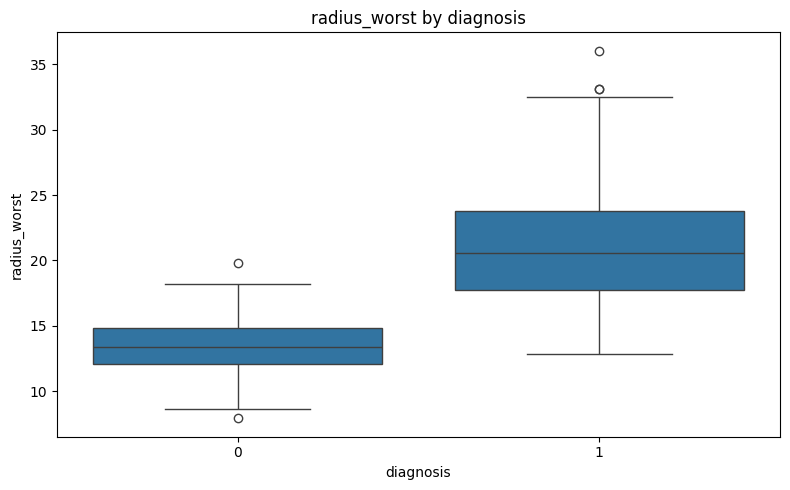

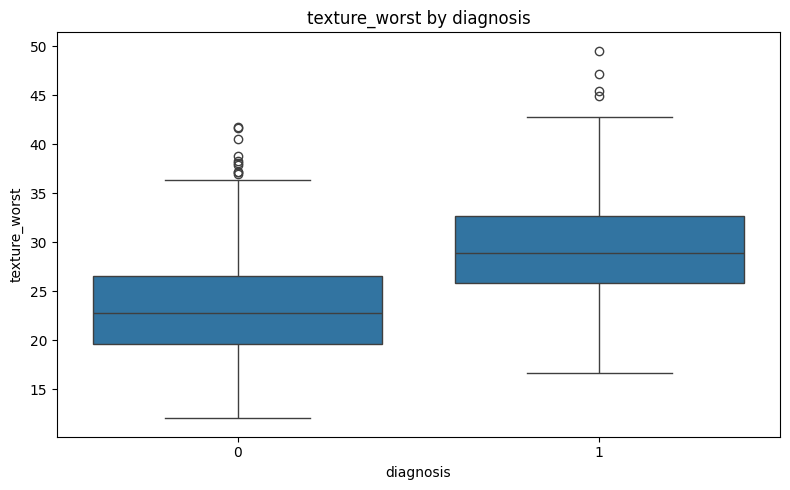

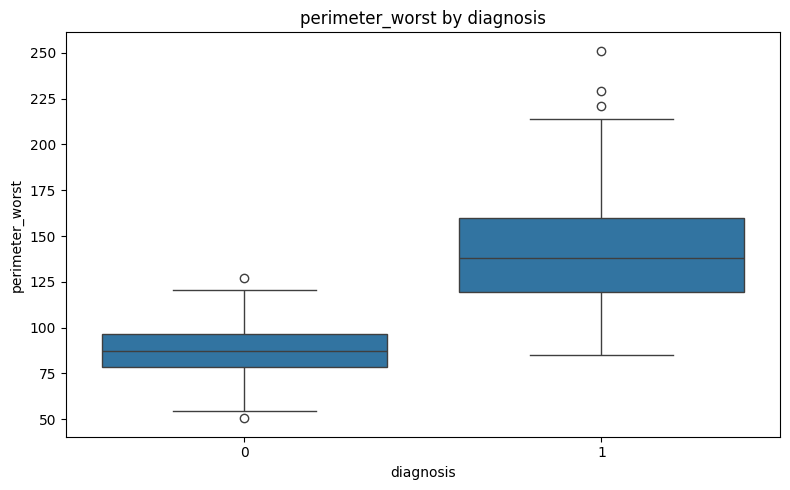

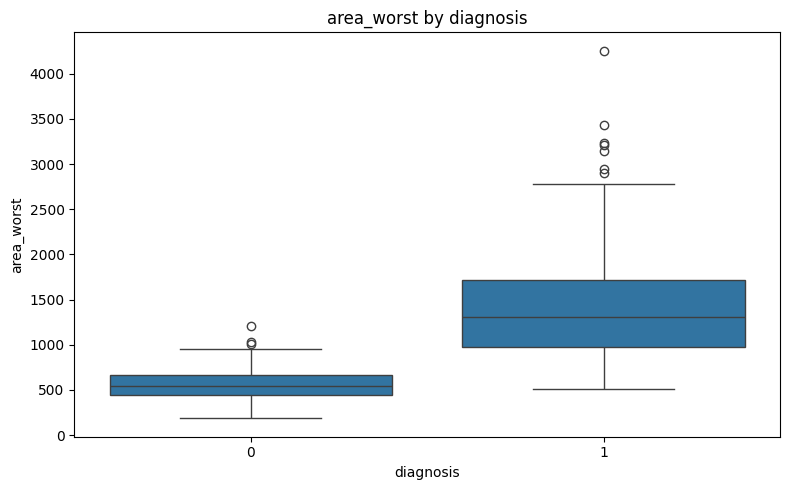

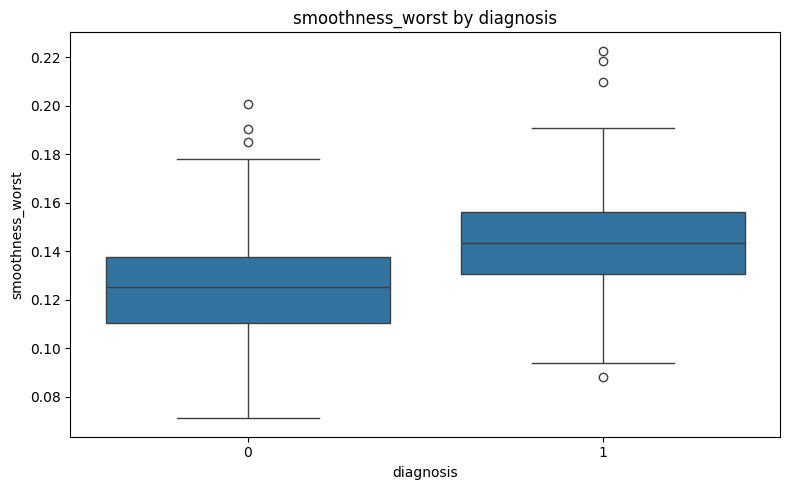

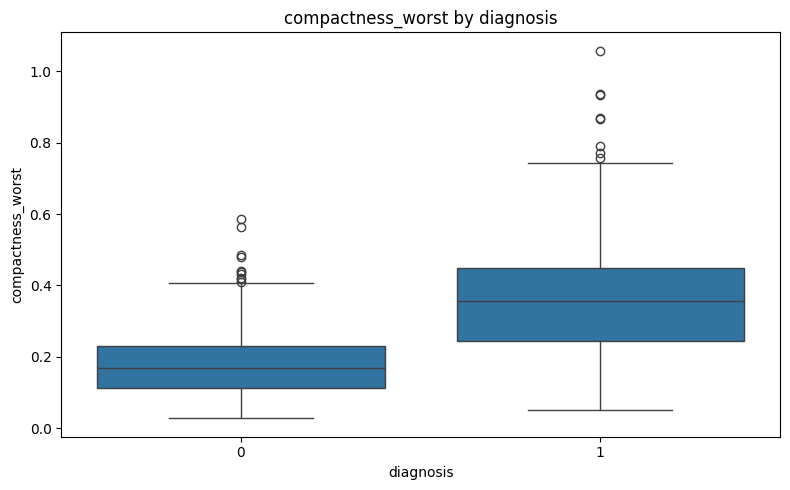

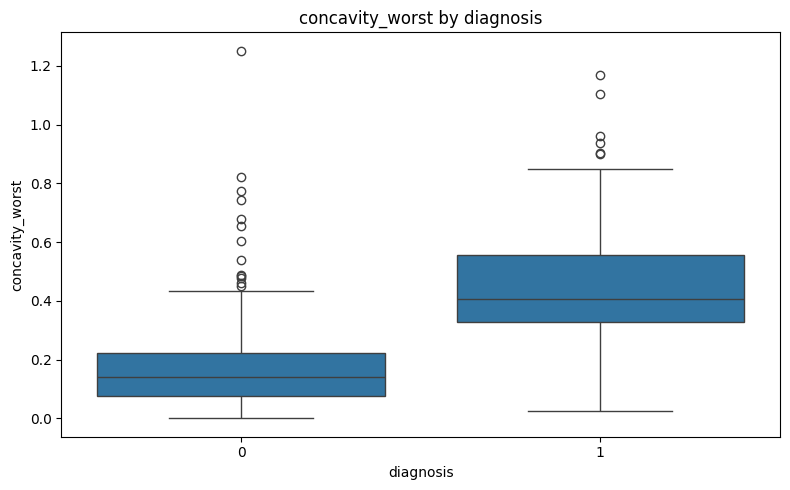

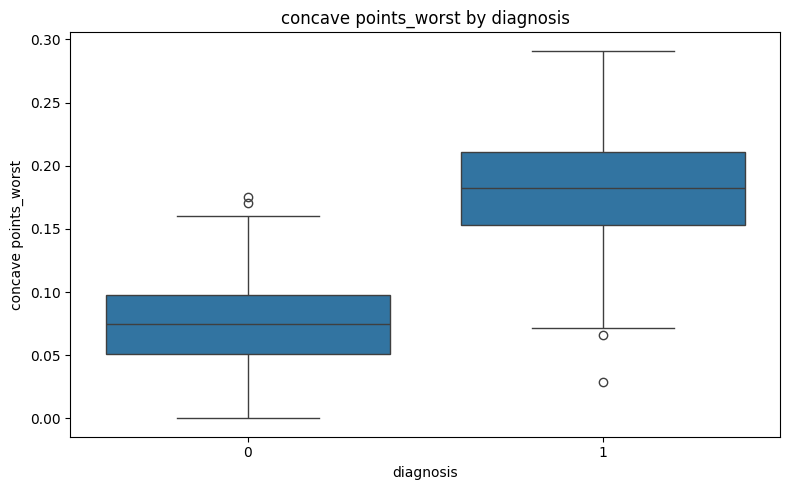

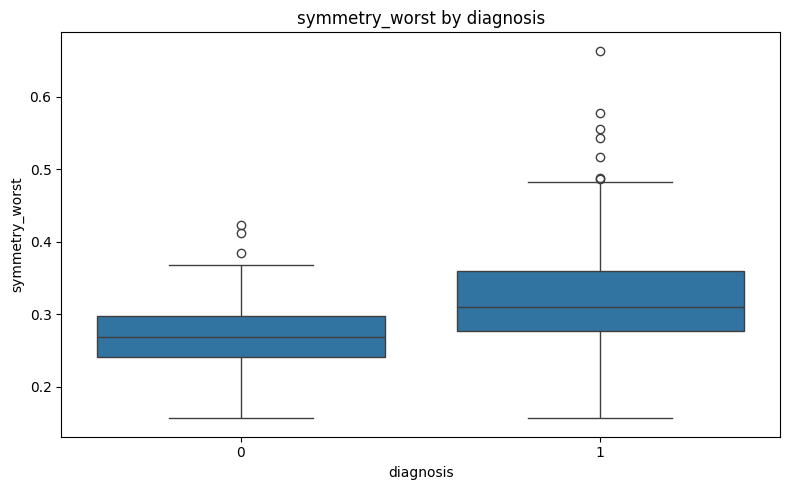

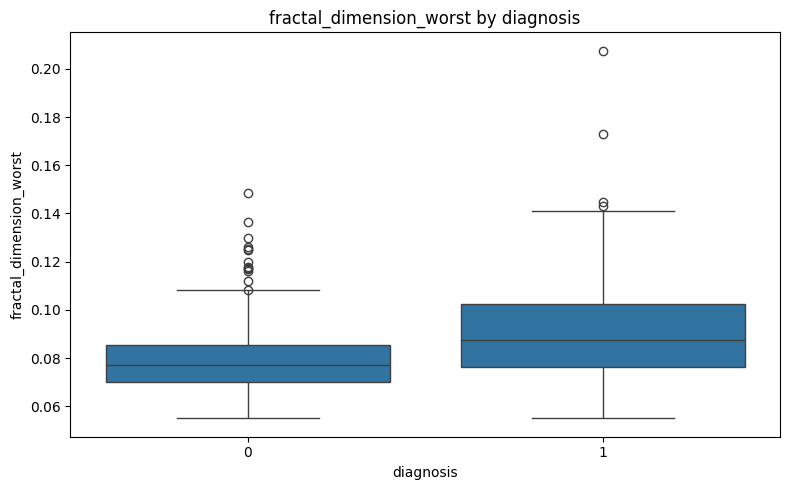

In [22]:
# for column in data.columns:
#     diagnosis_counts.plot(kind = "bar")
#     plt.title( "Counts of each Diagnosis")
#     plt.xlabel("Diagnosis")
#     plt.ylabel("Counts")
#     plt.show()

target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()

In [23]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
num_target_data = data 

In [25]:
num_target_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
project_root = "C:/Users\Maryl/breast_cancer_classifier"
interim_data_path = os.path.join(project_root, 'data', 'interim')



# Save the DataFrame with numerical target to the interim folder
# Assuming your DataFrame is called 'df_numerical_target'
num_target_data.to_csv(os.path.join(interim_data_path, 'dataset_numerical_target.csv'), index=False)


In [27]:

# # Define the path to the interim data folder
# interim_data_path = os.path.join('data', 'interim')

# # Check if directory exists
# if not os.path.exists(interim_data_path):
#     print(f"Directory '{interim_data_path}' does not exist. Creating it now...")
#     try:
#         os.makedirs(interim_data_path, exist_ok=True)
#         print(f"Successfully created directory: {interim_data_path}")
#     except Exception as e:
#         print(f"Error creating directory: {e}")
# else:
#     print(f"Directory '{interim_data_path}' already exists.")

# # Save the DataFrame with numerical target to the interim folder
# try:
#     # Assuming your DataFrame is called 'df_numerical_target'
#     df_numerical_target.to_csv(os.path.join(interim_data_path, 'dataset_numerical_target.csv'), index=False)
#     print(f"Successfully saved dataset to {os.path.join(interim_data_path, 'dataset_numerical_target.csv')}")
# except Exception as e:
#     print(f"Error saving dataset: {e}")

In [ ]:
mean_cols = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [ ]:
for feature in mean_cols[1:]:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='diagnosis', y=feature, data=data)
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.show()